In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 15.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torchmetrics.classification import BinaryAccuracy, BinaryF1Score
from tqdm import tqdm
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Result/Data/training_stroke1.csv")
data = data.drop(["Unnamed: 0"] ,axis = 1)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke
0,29,0,0,83.990000,33.200000,0,1,0,0,1,1,0,0,0,0,0,0
1,56,0,0,109.010000,23.200000,0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,0,61.200000,35.400000,0,1,0,0,1,0,0,1,0,0,1,0
3,37,0,0,156.700000,36.900000,0,1,0,0,1,0,0,1,0,0,1,0
4,39,0,0,56.360000,22.400000,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48195,80,0,0,67.677893,32.688333,0,1,0,0,1,0,0,1,0,0,1,1
48196,75,1,0,223.455500,24.635428,0,1,0,0,1,0,0,1,0,0,1,1
48197,81,1,0,72.154407,30.598354,0,0,1,0,1,0,0,0,1,0,1,1
48198,71,0,0,223.005820,30.502407,2,0,1,0,1,0,0,1,0,0,1,1


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[['smoking_status']])

# Get the categories that were encoded
categories = encoder.categories_

# Create custom column names based on the categories
column_names = [f'smoking_status_{cat}' for cat in categories[0][0:]]

# Create a new DataFrame with the one-hot encoded columns and custom column names
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

# Concatenate the new DataFrame with the original DataFrame, drop the original 'smoking_status' column
data = pd.concat([data, encoded_df], axis=1).drop(columns=['smoking_status'] ,axis = 1)
data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,smoking_status_0,smoking_status_1,smoking_status_2
0,29,0,0,83.990000,33.200000,1,0,0,1,1,0,0,0,0,0,0,1.0,0.0,0.0
1,56,0,0,109.010000,23.200000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
2,37,0,0,61.200000,35.400000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
3,37,0,0,156.700000,36.900000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
4,39,0,0,56.360000,22.400000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48195,80,0,0,67.677893,32.688333,1,0,0,1,0,0,1,0,0,1,1,1.0,0.0,0.0
48196,75,1,0,223.455500,24.635428,1,0,0,1,0,0,1,0,0,1,1,1.0,0.0,0.0
48197,81,1,0,72.154407,30.598354,0,1,0,1,0,0,0,1,0,1,1,1.0,0.0,0.0
48198,71,0,0,223.005820,30.502407,0,1,0,1,0,0,1,0,0,1,1,0.0,0.0,1.0


In [6]:
sc = MinMaxScaler()


X = data.drop(["stroke"] ,axis = 1)
y = data["stroke"]
X_train = X
y_train = y

X_train = X_train.values
y_train = y_train.values

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_train = X_train.reshape(len(X_train), 3, 6)

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
import torch
import torch.nn as nn

class Block(nn.Module):
    def __init__(self ,inChanel,out1 ,out2, out3 ,outChanel):
        super(Block, self).__init__()
        self.input = inChanel
        self.conv1 = nn.Conv2d(inChanel, out1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out1, out2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(out1, outChanel, kernel_size=2, padding=1)
        self.conv4 = nn.Conv2d(out2, outChanel, kernel_size=2, padding=1)
        temp = outChanel // 2
        self.conv5 = nn.Conv2d(outChanel, temp, kernel_size=1, padding=0)
        self.pooling = nn.MaxPool2d(kernel_size=2)
        self.relu = nn.PReLU()
        self.dropout = nn.Dropout(0.5)
        self.batchnorm = nn.BatchNorm2d(temp)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        #x = self.conv2(x)
        #x = self.relu(x)
        x = self.conv3(x)
        x = self.relu(x)
        #x = self.conv4(x)
        #x = self.relu(x)
        x = self.conv5(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        x = self.pooling(x)
        x = self.dropout(x)
        return x

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()

        self.block1 = Block(1, 8, 16, 32, 32)
        self.block2 = Block(16, 32, 64, 128, 64)
        self.block3 = Block(32, 64, 512, 800, 128)

        self.linear1 = nn.Linear(64, 32)
        self.linear2 = nn.Linear(32, 8)
        self.linear3 = nn.Linear(8, 1)
        self.pooling = nn.MaxPool2d(kernel_size=2)
        self.relu = nn.PReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        #x = self.pooling(x)
        #print(x.size())
        x = self.dropout(x)
        x = x.squeeze()
        #print(x.size())
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear3(x)
        x = self.dropout(x)
        return x


In [10]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

## Baging

In [ ]:
def BaggingDataset(x, y, seed=100):
  bags_x, bags_y = [], []

  neg = y == 0
  pos = y == 1
  n_min = min(np.sum(neg), np.sum(pos))

  i = 1
  while (i - 1) * n_min <= np.sum(neg):
    neg_x = x[neg][(i - 1) * n_min:i * n_min] if i * n_min <= np.sum(neg) else x[neg][(i - 1) * n_min:]
    neg_y = y[neg][(i - 1) * n_min:i * n_min] if i * n_min <= np.sum(neg) else y[neg][(i - 1) * n_min:]

    pos_x = x[pos][0:n_min] if i * n_min <= np.sum(neg) else x[pos].sample(np.sum(neg) - (i - 1) * n_min, random_state=42)
    pos_y = y[pos][0:n_min] if i * n_min <= np.sum(neg) else y[pos].sample(np.sum(neg) - (i - 1) * n_min, random_state=42)

    cat_x = np.concatenate([neg_x, pos_x])
    np.random.seed(seed)
    np.random.shuffle(cat_x)
    cat_x = cat_x.tolist()
    cat_y = np.concatenate([neg_y, pos_y])
    np.random.seed(seed)
    np.random.shuffle(cat_y)
    cat_y = cat_y.tolist()

    bags_x.append(cat_x)
    bags_y.append(cat_y)
    i += 1

  return bags_x, bags_y

In [ ]:
bags_x, bags_y = BaggingDataset(X, y)

In [ ]:
def train_valid_bags(bags_x, bags_y):
  x_train_bags, x_valid_bags, y_train_bags, y_valid_bags = [], [], [], []

  for i in range(len(bags_x)):
    x_train, x_valid, y_train, y_valid = train_test_split(np.array(bags_x[i]), np.array(bags_y[i]), random_state=42, test_size=0.2, stratify=np.array(bags_y[i]))
    x_train_bags.append(x_train)
    x_valid_bags.append(x_valid)
    y_train_bags.append(y_train)
    y_valid_bags.append(y_valid)

  return x_train_bags, x_valid_bags, y_train_bags, y_valid_bags

In [ ]:
x_train_bags, x_valid_bags, y_train_bags, y_valid_bags = train_valid_bags(bags_x, bags_y)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Result/Data/testing_stroke5.csv")
test = test.drop(["Unnamed: 0"] ,axis = 1)

encoded_data = encoder.fit_transform(test[['smoking_status']])

categories = encoder.categories_

column_names = [f'smoking_status_{cat}' for cat in categories[0][0:]]

encoded_df = pd.DataFrame(encoded_data, columns=column_names)

test = pd.concat([test, encoded_df], axis=1).drop(columns=['smoking_status'] ,axis = 1)
test_set = test
test_set

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,smoking_status_0,smoking_status_1,smoking_status_2
0,49,0,0,83.91,29.100000,0,1,0,1,0,0,1,0,0,0,0,1.0,0.0,0.0
1,28,0,0,97.79,25.600000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
2,38,0,0,104.97,21.700000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
3,65,0,0,108.46,34.500000,0,1,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
4,50,0,0,84.14,21.500000,1,0,0,1,0,0,1,0,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,82,0,0,72.70,18.000000,1,0,0,1,0,0,0,1,0,0,1,1.0,0.0,0.0
196,51,0,0,111.91,29.756194,0,1,0,1,0,0,1,0,0,1,1,1.0,0.0,0.0
197,42,0,0,83.41,25.400000,0,1,0,1,0,0,1,0,0,1,1,1.0,0.0,0.0
198,68,0,0,233.94,42.400000,0,1,0,1,0,0,1,0,0,1,1,1.0,0.0,0.0


In [ ]:
def convert_bag_tensor(x_train_bags, x_valid_bags, x_test, y_train_bags, y_valid_bags, y_test):
  x_train_tensors, x_valid_tensors, x_test_tensors, y_train_tensors, y_valid_tensors, y_test_tensors = [], [], [], [], [], []

  for i in range(len(x_train_bags)):
    x_train = torch.FloatTensor(x_train_bags[i])
    y_train = torch.LongTensor(y_train_bags[i])

    x_valid = torch.FloatTensor(x_valid_bags[i])
    y_valid = torch.LongTensor(y_valid_bags[i])

    x_test_temp = torch.FloatTensor(x_test.values)
    y_test_temp = torch.LongTensor(y_test.values)

    sc = MinMaxScaler()

    mu = x_train.mean(dim=0)
    std = x_train.std(dim=0) + 1e-5

    x_train = (x_train - mu) / std
    x_valid = (x_valid - mu) / std
    x_test_temp = (x_test_temp - mu) / std


    x_train_tensors.append(x_train.reshape(len(x_train), 3, 6))
    x_valid_tensors.append(x_valid.reshape(len(x_valid), 3, 6))
    x_test_tensors.append(x_test_temp.reshape(len(x_test_temp), 3, 6))
    y_train_tensors.append(y_train)
    y_valid_tensors.append(y_valid)
    y_test_tensors.append(y_test_temp)

  return x_train_tensors, x_valid_tensors, x_test_tensors, y_train_tensors, y_valid_tensors, y_test_tensors

In [ ]:
x_test = test_set.drop('stroke', axis=1)
y_test = test_set['stroke']

In [ ]:
x_train_tensors, x_valid_tensors, x_test_tensors, y_train_tensors, y_valid_tensors, y_test_tensors = convert_bag_tensor(x_train_bags,
                                                                                                                        x_valid_bags,
                                                                                                                        x_test,
                                                                                                                        y_train_bags,
                                                                                                                        y_valid_bags,
                                                                                                                        y_test)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
def bag_dataloader(x_train_tensors, x_valid_tensors, x_test_tensors, y_train_tensors, y_valid_tensors, y_test_tensors):

  train_loaders, valid_loaders, test_loaders = [], [], []

  for i in range(len(x_train_tensors)):

    train_dataset = TensorDataset(x_train_tensors[i], y_train_tensors[i])
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

    valid_dataset = TensorDataset(x_valid_tensors[i], y_valid_tensors[i])
    valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False)

    test_dataset = TensorDataset(x_test_tensors[i], y_test_tensors[i])
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    train_loaders.append(train_loader)
    valid_loaders.append(valid_loader)
    test_loaders.append(test_loader)

  return train_loaders, valid_loaders, test_loaders


In [ ]:
train_loaders, valid_loaders, test_loaders = bag_dataloader(x_train_tensors,
                                                            x_valid_tensors,
                                                            x_test_tensors,
                                                            y_train_tensors,
                                                            y_valid_tensors,
                                                            y_test_tensors)

In [ ]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, metric, epoch=None):
  tempLoss = 0
  model.train()
  loss_train = AverageMeter()
  metric.reset()

  #print(f'lr : {opt.param_groups[0]["lr"]}')
  with tqdm(train_loader, unit="batch") as tepoch:
    for inputs, targets in tepoch:
      if epoch is not None:
        tepoch.set_description(f"Epoch {epoch}")

      optimizer.zero_grad()
      inputs = inputs.to(device)
      targets = targets.type(torch.FloatTensor)
      targets = targets.to(device)
      inputs = inputs.unsqueeze(1)
      inputs = inputs.float()
      targets = targets.float()

      outputs = model(inputs).squeeze()

      loss = loss_fn(outputs, targets)
      tempLoss = loss.item()
      loss.backward()
      optimizer.step()

      loss_train.update(loss.item())#, n=len(targets)

      metric.update(outputs, targets.int())
      tepoch.set_postfix(Loss=loss_train.avg,
                         F1=100.*metric.compute().item())
  return model, loss_train.avg, metric.compute().item() ,tempLoss / len(targets)

In [ ]:
def evaluate(model, test_loader, loss_fn, metric):
  model.eval()
  loss_eval = AverageMeter()
  metric.reset()

  with torch.inference_mode():
    for i, (inputs, targets) in enumerate(test_loader):
      inputs = inputs.to(device)
      targets = targets.type(torch.FloatTensor)
      targets = targets.to(device)
      inputs = inputs.unsqueeze(1)
      inputs = inputs.float()
      targets = targets.float()

      outputs = model(inputs).squeeze()

      loss = loss_fn(outputs, targets)
      loss_eval.update(loss.item(), n=len(targets))
      metric.update(outputs, targets.int())
  return loss_eval.avg, metric.compute().item()

<IPython.core.display.Javascript object>

Epoch 0: 100%|██████████| 72/72 [00:01<00:00, 43.37batch/s, F1=28.1, Loss=0.703]


Valid: Loss = 0.6744, F1_Score = 0.5858
Model Saved!



Epoch 1: 100%|██████████| 72/72 [00:01<00:00, 55.50batch/s, F1=36.7, Loss=0.67]


Valid: Loss = 0.6116, F1_Score = 0.7647
Model Saved!



Epoch 2: 100%|██████████| 72/72 [00:02<00:00, 29.08batch/s, F1=43.1, Loss=0.643]


Valid: Loss = 0.5467, F1_Score = 0.8047
Model Saved!



Epoch 3: 100%|██████████| 72/72 [00:01<00:00, 58.00batch/s, F1=50.3, Loss=0.604]


Valid: Loss = 0.4927, F1_Score = 0.7988



Epoch 4: 100%|██████████| 72/72 [00:01<00:00, 58.49batch/s, F1=49.8, Loss=0.623]


Valid: Loss = 0.4891, F1_Score = 0.8031



Epoch 5: 100%|██████████| 72/72 [00:01<00:00, 61.08batch/s, F1=52.5, Loss=0.597]


Valid: Loss = 0.4909, F1_Score = 0.8043



Epoch 6: 100%|██████████| 72/72 [00:01<00:00, 60.13batch/s, F1=52.3, Loss=0.598]


Valid: Loss = 0.4794, F1_Score = 0.8102
Model Saved!



Epoch 7: 100%|██████████| 72/72 [00:01<00:00, 60.70batch/s, F1=52.6, Loss=0.592]


Valid: Loss = 0.4851, F1_Score = 0.8081



Epoch 8: 100%|██████████| 72/72 [00:01<00:00, 58.79batch/s, F1=54.8, Loss=0.593]


Valid: Loss = 0.4957, F1_Score = 0.813
Model Saved!



Epoch 9: 100%|██████████| 72/72 [00:01<00:00, 55.87batch/s, F1=53.2, Loss=0.597]


Valid: Loss = 0.4718, F1_Score = 0.8126



Epoch 10: 100%|██████████| 72/72 [00:01<00:00, 49.85batch/s, F1=53.9, Loss=0.596]


Valid: Loss = 0.4936, F1_Score = 0.8181
Model Saved!



Epoch 11: 100%|██████████| 72/72 [00:02<00:00, 26.91batch/s, F1=53.8, Loss=0.59]


Valid: Loss = 0.4889, F1_Score = 0.8172



Epoch 12: 100%|██████████| 72/72 [00:01<00:00, 54.54batch/s, F1=54.5, Loss=0.598]


Valid: Loss = 0.4824, F1_Score = 0.8202
Model Saved!



Epoch 13: 100%|██████████| 72/72 [00:01<00:00, 58.16batch/s, F1=54, Loss=0.597]


Valid: Loss = 0.4837, F1_Score = 0.8169



Epoch 14: 100%|██████████| 72/72 [00:01<00:00, 60.85batch/s, F1=53.2, Loss=0.592]


Valid: Loss = 0.4748, F1_Score = 0.8134



Epoch 15: 100%|██████████| 72/72 [00:01<00:00, 59.32batch/s, F1=53.5, Loss=0.583]


Valid: Loss = 0.4539, F1_Score = 0.8181



Epoch 16: 100%|██████████| 72/72 [00:01<00:00, 61.14batch/s, F1=55.2, Loss=0.575]


Valid: Loss = 0.4558, F1_Score = 0.8186



Epoch 17: 100%|██████████| 72/72 [00:01<00:00, 60.70batch/s, F1=54.4, Loss=0.576]


Valid: Loss = 0.4533, F1_Score = 0.8224
Model Saved!



Epoch 18: 100%|██████████| 72/72 [00:01<00:00, 59.35batch/s, F1=55.7, Loss=0.589]


Valid: Loss = 0.472, F1_Score = 0.8265
Model Saved!



Epoch 19: 100%|██████████| 72/72 [00:01<00:00, 58.47batch/s, F1=55, Loss=0.569]


Valid: Loss = 0.4544, F1_Score = 0.8232



Epoch 20: 100%|██████████| 72/72 [00:01<00:00, 49.28batch/s, F1=55, Loss=0.581]


Valid: Loss = 0.4754, F1_Score = 0.8271
Model Saved!



Epoch 21: 100%|██████████| 72/72 [00:01<00:00, 48.41batch/s, F1=54.4, Loss=0.574]


Valid: Loss = 0.4669, F1_Score = 0.8203



Epoch 22: 100%|██████████| 72/72 [00:01<00:00, 47.58batch/s, F1=54.1, Loss=0.583]


Valid: Loss = 0.4562, F1_Score = 0.8168



Epoch 23: 100%|██████████| 72/72 [00:01<00:00, 59.43batch/s, F1=54.3, Loss=0.575]


Valid: Loss = 0.4473, F1_Score = 0.8226



Epoch 24: 100%|██████████| 72/72 [00:01<00:00, 59.97batch/s, F1=53.3, Loss=0.596]


Valid: Loss = 0.4532, F1_Score = 0.8183



Epoch 25: 100%|██████████| 72/72 [00:01<00:00, 60.27batch/s, F1=56.4, Loss=0.574]


Valid: Loss = 0.4568, F1_Score = 0.8188



Epoch 26: 100%|██████████| 72/72 [00:01<00:00, 60.12batch/s, F1=55.1, Loss=0.575]


Valid: Loss = 0.466, F1_Score = 0.825



Epoch 27: 100%|██████████| 72/72 [00:01<00:00, 60.05batch/s, F1=54, Loss=0.581]


Valid: Loss = 0.4583, F1_Score = 0.8176



Epoch 28: 100%|██████████| 72/72 [00:01<00:00, 59.37batch/s, F1=53.7, Loss=0.586]


Valid: Loss = 0.4605, F1_Score = 0.8162



Epoch 29: 100%|██████████| 72/72 [00:01<00:00, 59.67batch/s, F1=54.6, Loss=0.572]


Valid: Loss = 0.4601, F1_Score = 0.8182



Epoch 30: 100%|██████████| 72/72 [00:01<00:00, 55.25batch/s, F1=54.8, Loss=0.572]


Valid: Loss = 0.457, F1_Score = 0.8226



Epoch 31: 100%|██████████| 72/72 [00:01<00:00, 51.70batch/s, F1=53.9, Loss=0.575]


Valid: Loss = 0.4704, F1_Score = 0.8221



Epoch 32: 100%|██████████| 72/72 [00:01<00:00, 53.01batch/s, F1=55.8, Loss=0.573]


Valid: Loss = 0.4556, F1_Score = 0.8213



Epoch 33: 100%|██████████| 72/72 [00:01<00:00, 49.79batch/s, F1=54.9, Loss=0.572]


Valid: Loss = 0.4521, F1_Score = 0.8278
Model Saved!



Epoch 34: 100%|██████████| 72/72 [00:01<00:00, 56.73batch/s, F1=55.4, Loss=0.574]


Valid: Loss = 0.4517, F1_Score = 0.8238



Epoch 35: 100%|██████████| 72/72 [00:01<00:00, 58.93batch/s, F1=55.2, Loss=0.569]


Valid: Loss = 0.4643, F1_Score = 0.8229



Epoch 36: 100%|██████████| 72/72 [00:01<00:00, 58.89batch/s, F1=55.4, Loss=0.568]


Valid: Loss = 0.4399, F1_Score = 0.8228



Epoch 37: 100%|██████████| 72/72 [00:01<00:00, 58.88batch/s, F1=54.6, Loss=0.576]


Valid: Loss = 0.4546, F1_Score = 0.8267



Epoch 38: 100%|██████████| 72/72 [00:01<00:00, 58.62batch/s, F1=54.9, Loss=0.567]


Valid: Loss = 0.46, F1_Score = 0.8249



Epoch 39: 100%|██████████| 72/72 [00:01<00:00, 58.63batch/s, F1=55.3, Loss=0.567]


Valid: Loss = 0.4592, F1_Score = 0.8267



Epoch 40: 100%|██████████| 72/72 [00:01<00:00, 59.59batch/s, F1=55.1, Loss=0.578]


Valid: Loss = 0.4582, F1_Score = 0.824



Epoch 41: 100%|██████████| 72/72 [00:01<00:00, 54.82batch/s, F1=53.5, Loss=0.567]


Valid: Loss = 0.4661, F1_Score = 0.8265



Epoch 42: 100%|██████████| 72/72 [00:01<00:00, 54.45batch/s, F1=55.6, Loss=0.567]


Valid: Loss = 0.4459, F1_Score = 0.8222



Epoch 43: 100%|██████████| 72/72 [00:01<00:00, 50.40batch/s, F1=57.2, Loss=0.564]


Valid: Loss = 0.4466, F1_Score = 0.8231



Epoch 44: 100%|██████████| 72/72 [00:01<00:00, 54.41batch/s, F1=54.3, Loss=0.578]


Valid: Loss = 0.4655, F1_Score = 0.8176



Epoch 45: 100%|██████████| 72/72 [00:01<00:00, 52.39batch/s, F1=54.5, Loss=0.57]


Valid: Loss = 0.4432, F1_Score = 0.8219



Epoch 46: 100%|██████████| 72/72 [00:01<00:00, 58.98batch/s, F1=55.9, Loss=0.568]


Valid: Loss = 0.4426, F1_Score = 0.825



Epoch 47: 100%|██████████| 72/72 [00:01<00:00, 57.04batch/s, F1=55.3, Loss=0.569]


Valid: Loss = 0.4431, F1_Score = 0.8249



Epoch 48: 100%|██████████| 72/72 [00:01<00:00, 58.14batch/s, F1=55.3, Loss=0.563]


Valid: Loss = 0.4414, F1_Score = 0.8215



Epoch 49: 100%|██████████| 72/72 [00:01<00:00, 57.36batch/s, F1=55.5, Loss=0.562]


Valid: Loss = 0.4398, F1_Score = 0.8209



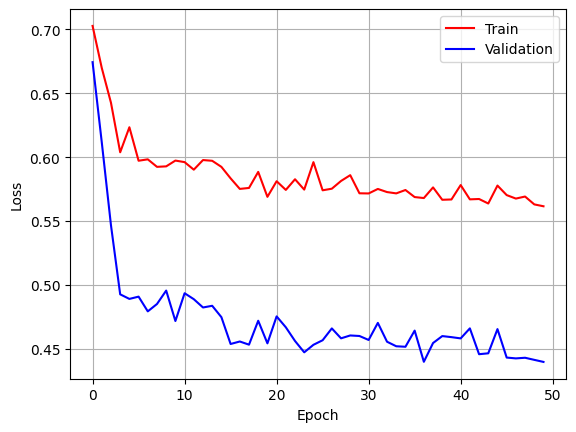

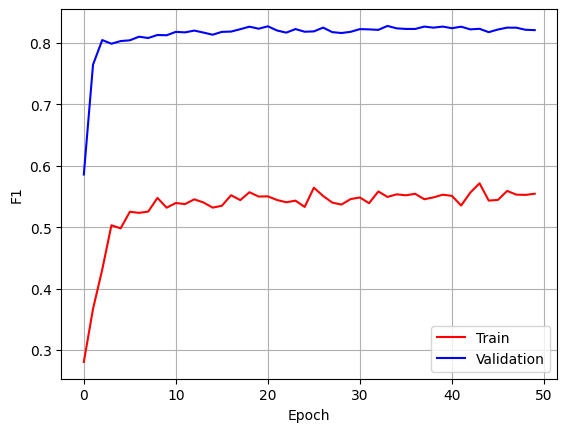

Epoch 0: 100%|██████████| 72/72 [00:01<00:00, 56.96batch/s, F1=43.7, Loss=0.719]


Valid: Loss = 0.6978, F1_Score = 0.0
Model Saved!



Epoch 1: 100%|██████████| 72/72 [00:01<00:00, 54.17batch/s, F1=45.7, Loss=0.696]


Valid: Loss = 0.6729, F1_Score = 0.7116
Model Saved!



Epoch 2: 100%|██████████| 72/72 [00:01<00:00, 53.35batch/s, F1=49.9, Loss=0.665]


Valid: Loss = 0.5722, F1_Score = 0.7918
Model Saved!



Epoch 3: 100%|██████████| 72/72 [00:01<00:00, 48.01batch/s, F1=53.8, Loss=0.634]


Valid: Loss = 0.5571, F1_Score = 0.7858



Epoch 4: 100%|██████████| 72/72 [00:01<00:00, 48.13batch/s, F1=53.8, Loss=0.613]


Valid: Loss = 0.5121, F1_Score = 0.8003
Model Saved!



Epoch 5: 100%|██████████| 72/72 [00:01<00:00, 46.47batch/s, F1=55.5, Loss=0.614]


Valid: Loss = 0.5063, F1_Score = 0.8028
Model Saved!



Epoch 6: 100%|██████████| 72/72 [00:01<00:00, 53.42batch/s, F1=53.8, Loss=0.607]


Valid: Loss = 0.5228, F1_Score = 0.799



Epoch 7: 100%|██████████| 72/72 [00:01<00:00, 56.43batch/s, F1=55.6, Loss=0.594]


Valid: Loss = 0.5043, F1_Score = 0.8075
Model Saved!



Epoch 8: 100%|██████████| 72/72 [00:01<00:00, 57.76batch/s, F1=56.1, Loss=0.603]


Valid: Loss = 0.5116, F1_Score = 0.8015



Epoch 9: 100%|██████████| 72/72 [00:01<00:00, 58.64batch/s, F1=53.8, Loss=0.592]


Valid: Loss = 0.4982, F1_Score = 0.8071



Epoch 10: 100%|██████████| 72/72 [00:01<00:00, 56.11batch/s, F1=55, Loss=0.594]


Valid: Loss = 0.4894, F1_Score = 0.8071



Epoch 11: 100%|██████████| 72/72 [00:01<00:00, 57.40batch/s, F1=54.2, Loss=0.594]


Valid: Loss = 0.4966, F1_Score = 0.8093
Model Saved!



Epoch 12: 100%|██████████| 72/72 [00:01<00:00, 58.39batch/s, F1=54.5, Loss=0.626]


Valid: Loss = 0.5077, F1_Score = 0.8026



Epoch 13: 100%|██████████| 72/72 [00:01<00:00, 51.81batch/s, F1=54.6, Loss=0.596]


Valid: Loss = 0.4942, F1_Score = 0.8061



Epoch 14: 100%|██████████| 72/72 [00:01<00:00, 52.49batch/s, F1=54.9, Loss=0.586]


Valid: Loss = 0.4763, F1_Score = 0.8094
Model Saved!



Epoch 15: 100%|██████████| 72/72 [00:01<00:00, 48.85batch/s, F1=54.9, Loss=0.587]


Valid: Loss = 0.4863, F1_Score = 0.8114
Model Saved!



Epoch 16: 100%|██████████| 72/72 [00:01<00:00, 49.59batch/s, F1=55.1, Loss=0.601]


Valid: Loss = 0.4897, F1_Score = 0.8058



Epoch 17: 100%|██████████| 72/72 [00:01<00:00, 47.11batch/s, F1=54.4, Loss=0.595]


Valid: Loss = 0.491, F1_Score = 0.8071



Epoch 18: 100%|██████████| 72/72 [00:01<00:00, 55.66batch/s, F1=56.6, Loss=0.581]


Valid: Loss = 0.4823, F1_Score = 0.8092



Epoch 19: 100%|██████████| 72/72 [00:01<00:00, 54.53batch/s, F1=55.8, Loss=0.58]


Valid: Loss = 0.4823, F1_Score = 0.8087



Epoch 20: 100%|██████████| 72/72 [00:01<00:00, 56.30batch/s, F1=55.8, Loss=0.579]


Valid: Loss = 0.488, F1_Score = 0.8119
Model Saved!



Epoch 21: 100%|██████████| 72/72 [00:01<00:00, 56.20batch/s, F1=55, Loss=0.602]


Valid: Loss = 0.4809, F1_Score = 0.8154
Model Saved!



Epoch 22: 100%|██████████| 72/72 [00:01<00:00, 56.23batch/s, F1=54.1, Loss=0.591]


Valid: Loss = 0.4967, F1_Score = 0.8093



Epoch 23: 100%|██████████| 72/72 [00:01<00:00, 56.69batch/s, F1=55.5, Loss=0.596]


Valid: Loss = 0.4737, F1_Score = 0.8104



Epoch 24: 100%|██████████| 72/72 [00:01<00:00, 56.34batch/s, F1=54.5, Loss=0.591]


Valid: Loss = 0.5002, F1_Score = 0.8034



Epoch 25: 100%|██████████| 72/72 [00:01<00:00, 49.91batch/s, F1=56.3, Loss=0.585]


Valid: Loss = 0.4817, F1_Score = 0.8096



Epoch 26: 100%|██████████| 72/72 [00:01<00:00, 51.64batch/s, F1=56.4, Loss=0.585]


Valid: Loss = 0.4805, F1_Score = 0.8129



Epoch 27: 100%|██████████| 72/72 [00:01<00:00, 51.16batch/s, F1=55, Loss=0.582]


Valid: Loss = 0.4829, F1_Score = 0.808



Epoch 28: 100%|██████████| 72/72 [00:01<00:00, 47.87batch/s, F1=55.6, Loss=0.584]


Valid: Loss = 0.4867, F1_Score = 0.8126



Epoch 29: 100%|██████████| 72/72 [00:01<00:00, 52.92batch/s, F1=56.1, Loss=0.581]


Valid: Loss = 0.483, F1_Score = 0.8103



Epoch 30: 100%|██████████| 72/72 [00:01<00:00, 55.38batch/s, F1=55.6, Loss=0.582]


Valid: Loss = 0.5085, F1_Score = 0.8084



Epoch 31: 100%|██████████| 72/72 [00:01<00:00, 55.50batch/s, F1=54.9, Loss=0.587]


Valid: Loss = 0.4957, F1_Score = 0.8103



Epoch 32: 100%|██████████| 72/72 [00:01<00:00, 54.31batch/s, F1=55.3, Loss=0.579]


Valid: Loss = 0.4763, F1_Score = 0.816
Model Saved!



Epoch 33: 100%|██████████| 72/72 [00:01<00:00, 55.46batch/s, F1=53.7, Loss=0.576]


Valid: Loss = 0.4766, F1_Score = 0.8125



Epoch 34: 100%|██████████| 72/72 [00:01<00:00, 56.01batch/s, F1=55.1, Loss=0.584]


Valid: Loss = 0.4791, F1_Score = 0.8099



Epoch 35: 100%|██████████| 72/72 [00:01<00:00, 59.33batch/s, F1=56.4, Loss=0.577]


Valid: Loss = 0.4783, F1_Score = 0.8134



Epoch 36: 100%|██████████| 72/72 [00:01<00:00, 51.36batch/s, F1=55, Loss=0.575]


Valid: Loss = 0.4781, F1_Score = 0.8123



Epoch 37: 100%|██████████| 72/72 [00:01<00:00, 51.31batch/s, F1=54.6, Loss=0.585]


Valid: Loss = 0.4672, F1_Score = 0.8107



Epoch 38: 100%|██████████| 72/72 [00:01<00:00, 51.10batch/s, F1=54.6, Loss=0.575]


Valid: Loss = 0.4672, F1_Score = 0.8064



Epoch 39: 100%|██████████| 72/72 [00:01<00:00, 49.59batch/s, F1=55.6, Loss=0.573]


Valid: Loss = 0.4744, F1_Score = 0.8152



Epoch 40: 100%|██████████| 72/72 [00:01<00:00, 48.42batch/s, F1=56, Loss=0.573]


Valid: Loss = 0.4667, F1_Score = 0.8097



Epoch 41: 100%|██████████| 72/72 [00:01<00:00, 56.39batch/s, F1=56, Loss=0.566]


Valid: Loss = 0.456, F1_Score = 0.8058



Epoch 42: 100%|██████████| 72/72 [00:01<00:00, 56.02batch/s, F1=56.2, Loss=0.57]


Valid: Loss = 0.4734, F1_Score = 0.8134



Epoch 43: 100%|██████████| 72/72 [00:01<00:00, 56.17batch/s, F1=56.2, Loss=0.566]


Valid: Loss = 0.4532, F1_Score = 0.8092



Epoch 44: 100%|██████████| 72/72 [00:01<00:00, 57.02batch/s, F1=56.3, Loss=0.56]


Valid: Loss = 0.4584, F1_Score = 0.8127



Epoch 45: 100%|██████████| 72/72 [00:01<00:00, 55.05batch/s, F1=55.4, Loss=0.57]


Valid: Loss = 0.4519, F1_Score = 0.8172
Model Saved!



Epoch 46: 100%|██████████| 72/72 [00:01<00:00, 54.77batch/s, F1=55.5, Loss=0.605]


Valid: Loss = 0.4741, F1_Score = 0.817



Epoch 47: 100%|██████████| 72/72 [00:01<00:00, 54.79batch/s, F1=53.7, Loss=0.596]


Valid: Loss = 0.4934, F1_Score = 0.8148



Epoch 48: 100%|██████████| 72/72 [00:01<00:00, 53.36batch/s, F1=54.2, Loss=0.584]


Valid: Loss = 0.4873, F1_Score = 0.8181
Model Saved!



Epoch 49: 100%|██████████| 72/72 [00:01<00:00, 52.90batch/s, F1=55.8, Loss=0.582]


Valid: Loss = 0.4753, F1_Score = 0.8154



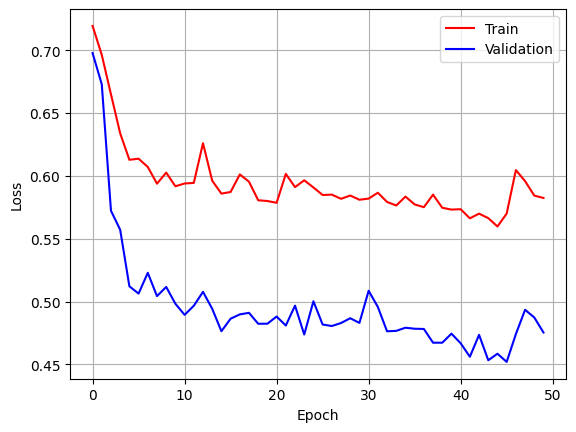

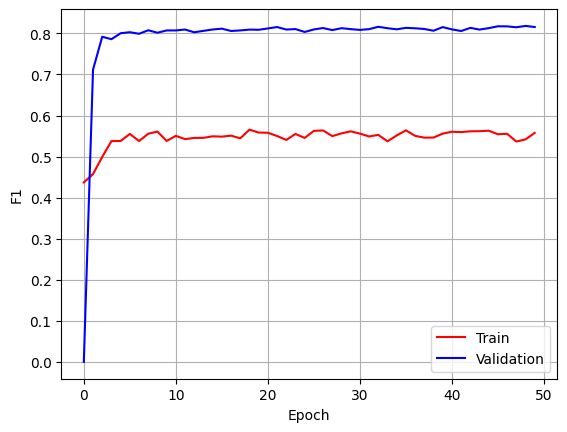

Epoch 0: 100%|██████████| 72/72 [00:01<00:00, 55.16batch/s, F1=27, Loss=0.708]


Valid: Loss = 0.6614, F1_Score = 0.6113
Model Saved!



Epoch 1: 100%|██████████| 72/72 [00:01<00:00, 52.58batch/s, F1=33.9, Loss=0.672]


Valid: Loss = 0.6251, F1_Score = 0.6494
Model Saved!



Epoch 2: 100%|██████████| 72/72 [00:01<00:00, 46.71batch/s, F1=45.3, Loss=0.637]


Valid: Loss = 0.5604, F1_Score = 0.799
Model Saved!



Epoch 3: 100%|██████████| 72/72 [00:01<00:00, 50.54batch/s, F1=45.6, Loss=0.628]


Valid: Loss = 0.5312, F1_Score = 0.798



Epoch 4: 100%|██████████| 72/72 [00:01<00:00, 54.46batch/s, F1=48.2, Loss=0.623]


Valid: Loss = 0.5466, F1_Score = 0.7976



Epoch 5: 100%|██████████| 72/72 [00:01<00:00, 55.57batch/s, F1=50.6, Loss=0.615]


Valid: Loss = 0.531, F1_Score = 0.8044
Model Saved!



Epoch 6: 100%|██████████| 72/72 [00:01<00:00, 55.43batch/s, F1=51, Loss=0.598]


Valid: Loss = 0.5065, F1_Score = 0.8053
Model Saved!



Epoch 7: 100%|██████████| 72/72 [00:01<00:00, 53.32batch/s, F1=52.7, Loss=0.598]


Valid: Loss = 0.4946, F1_Score = 0.8065
Model Saved!



Epoch 8: 100%|██████████| 72/72 [00:01<00:00, 53.64batch/s, F1=51.6, Loss=0.598]


Valid: Loss = 0.4992, F1_Score = 0.8043



Epoch 9: 100%|██████████| 72/72 [00:01<00:00, 51.50batch/s, F1=53.6, Loss=0.591]


Valid: Loss = 0.4979, F1_Score = 0.8094
Model Saved!



Epoch 10: 100%|██████████| 72/72 [00:01<00:00, 47.53batch/s, F1=52.1, Loss=0.596]


Valid: Loss = 0.4884, F1_Score = 0.8095
Model Saved!



Epoch 11: 100%|██████████| 72/72 [00:01<00:00, 47.76batch/s, F1=54.7, Loss=0.588]


Valid: Loss = 0.4954, F1_Score = 0.802



Epoch 12: 100%|██████████| 72/72 [00:01<00:00, 48.26batch/s, F1=54.8, Loss=0.588]


Valid: Loss = 0.4934, F1_Score = 0.8072



Epoch 13: 100%|██████████| 72/72 [00:01<00:00, 50.16batch/s, F1=54.8, Loss=0.59]


Valid: Loss = 0.4836, F1_Score = 0.808



Epoch 14: 100%|██████████| 72/72 [00:01<00:00, 50.77batch/s, F1=54.1, Loss=0.585]


Valid: Loss = 0.4696, F1_Score = 0.8142
Model Saved!



Epoch 15: 100%|██████████| 72/72 [00:01<00:00, 53.90batch/s, F1=53.7, Loss=0.587]


Valid: Loss = 0.4858, F1_Score = 0.8138



Epoch 16: 100%|██████████| 72/72 [00:01<00:00, 54.23batch/s, F1=54, Loss=0.583]


Valid: Loss = 0.4762, F1_Score = 0.8088



Epoch 17: 100%|██████████| 72/72 [00:01<00:00, 55.98batch/s, F1=53.9, Loss=0.601]


Valid: Loss = 0.5327, F1_Score = 0.8123



Epoch 18: 100%|██████████| 72/72 [00:01<00:00, 54.68batch/s, F1=54.2, Loss=0.573]


Valid: Loss = 0.4743, F1_Score = 0.8131



Epoch 19: 100%|██████████| 72/72 [00:01<00:00, 54.53batch/s, F1=53.3, Loss=0.587]


Valid: Loss = 0.474, F1_Score = 0.8106



Epoch 20: 100%|██████████| 72/72 [00:01<00:00, 54.81batch/s, F1=55.5, Loss=0.573]


Valid: Loss = 0.4602, F1_Score = 0.8138



Epoch 21: 100%|██████████| 72/72 [00:01<00:00, 50.84batch/s, F1=55.6, Loss=0.582]


Valid: Loss = 0.4927, F1_Score = 0.8115



Epoch 22: 100%|██████████| 72/72 [00:01<00:00, 45.27batch/s, F1=54.9, Loss=0.579]


Valid: Loss = 0.4916, F1_Score = 0.8172
Model Saved!



Epoch 23: 100%|██████████| 72/72 [00:01<00:00, 48.15batch/s, F1=55.6, Loss=0.576]


Valid: Loss = 0.4759, F1_Score = 0.8152



Epoch 24: 100%|██████████| 72/72 [00:01<00:00, 48.71batch/s, F1=56.6, Loss=0.586]


Valid: Loss = 0.4837, F1_Score = 0.8136



Epoch 25: 100%|██████████| 72/72 [00:01<00:00, 46.37batch/s, F1=54.5, Loss=0.581]


Valid: Loss = 0.4748, F1_Score = 0.81



Epoch 26: 100%|██████████| 72/72 [00:01<00:00, 51.75batch/s, F1=56, Loss=0.609]


Valid: Loss = 0.4795, F1_Score = 0.8148



Epoch 27: 100%|██████████| 72/72 [00:01<00:00, 54.80batch/s, F1=55.8, Loss=0.582]


Valid: Loss = 0.4846, F1_Score = 0.808



Epoch 28: 100%|██████████| 72/72 [00:01<00:00, 53.42batch/s, F1=54.9, Loss=0.588]


Valid: Loss = 0.475, F1_Score = 0.8157



Epoch 29: 100%|██████████| 72/72 [00:01<00:00, 55.03batch/s, F1=56.6, Loss=0.579]


Valid: Loss = 0.4663, F1_Score = 0.8174
Model Saved!



Epoch 30: 100%|██████████| 72/72 [00:01<00:00, 54.20batch/s, F1=54.8, Loss=0.584]


Valid: Loss = 0.4735, F1_Score = 0.8132



Epoch 31: 100%|██████████| 72/72 [00:01<00:00, 53.51batch/s, F1=56.1, Loss=0.576]


Valid: Loss = 0.4592, F1_Score = 0.8189
Model Saved!



Epoch 32: 100%|██████████| 72/72 [00:01<00:00, 51.92batch/s, F1=56.9, Loss=0.571]


Valid: Loss = 0.4646, F1_Score = 0.8178



Epoch 33: 100%|██████████| 72/72 [00:01<00:00, 47.33batch/s, F1=54.9, Loss=0.587]


Valid: Loss = 0.4656, F1_Score = 0.8183



Epoch 34: 100%|██████████| 72/72 [00:01<00:00, 51.53batch/s, F1=56.7, Loss=0.576]


Valid: Loss = 0.4631, F1_Score = 0.8214
Model Saved!



Epoch 35: 100%|██████████| 72/72 [00:01<00:00, 51.10batch/s, F1=55.6, Loss=0.568]


Valid: Loss = 0.4742, F1_Score = 0.8079



Epoch 36: 100%|██████████| 72/72 [00:01<00:00, 54.34batch/s, F1=54.9, Loss=0.583]


Valid: Loss = 0.4626, F1_Score = 0.8141



Epoch 37: 100%|██████████| 72/72 [00:01<00:00, 47.60batch/s, F1=56, Loss=0.579]


Valid: Loss = 0.4686, F1_Score = 0.8126



Epoch 38: 100%|██████████| 72/72 [00:01<00:00, 50.56batch/s, F1=55.5, Loss=0.573]


Valid: Loss = 0.4828, F1_Score = 0.8189



Epoch 39: 100%|██████████| 72/72 [00:01<00:00, 51.82batch/s, F1=54.9, Loss=0.57]


Valid: Loss = 0.4674, F1_Score = 0.8197



Epoch 40: 100%|██████████| 72/72 [00:01<00:00, 52.70batch/s, F1=55.4, Loss=0.569]


Valid: Loss = 0.4702, F1_Score = 0.8197



Epoch 41: 100%|██████████| 72/72 [00:01<00:00, 55.33batch/s, F1=55.9, Loss=0.565]


Valid: Loss = 0.4579, F1_Score = 0.8221
Model Saved!



Epoch 42: 100%|██████████| 72/72 [00:01<00:00, 54.65batch/s, F1=56.1, Loss=0.568]


Valid: Loss = 0.459, F1_Score = 0.8195



Epoch 43: 100%|██████████| 72/72 [00:01<00:00, 54.73batch/s, F1=56.2, Loss=0.567]


Valid: Loss = 0.4595, F1_Score = 0.8217



Epoch 44: 100%|██████████| 72/72 [00:01<00:00, 51.59batch/s, F1=55.8, Loss=0.58]


Valid: Loss = 0.4887, F1_Score = 0.8201



Epoch 45: 100%|██████████| 72/72 [00:01<00:00, 53.82batch/s, F1=54.5, Loss=0.564]


Valid: Loss = 0.4647, F1_Score = 0.8186



Epoch 46: 100%|██████████| 72/72 [00:01<00:00, 48.58batch/s, F1=55.9, Loss=0.564]


Valid: Loss = 0.4613, F1_Score = 0.8212



Epoch 47: 100%|██████████| 72/72 [00:01<00:00, 50.05batch/s, F1=55, Loss=0.565]


Valid: Loss = 0.4495, F1_Score = 0.8182



Epoch 48: 100%|██████████| 72/72 [00:01<00:00, 48.51batch/s, F1=54.9, Loss=0.582]


Valid: Loss = 0.4616, F1_Score = 0.8198



Epoch 49: 100%|██████████| 72/72 [00:01<00:00, 48.11batch/s, F1=54.5, Loss=0.571]


Valid: Loss = 0.4656, F1_Score = 0.8168



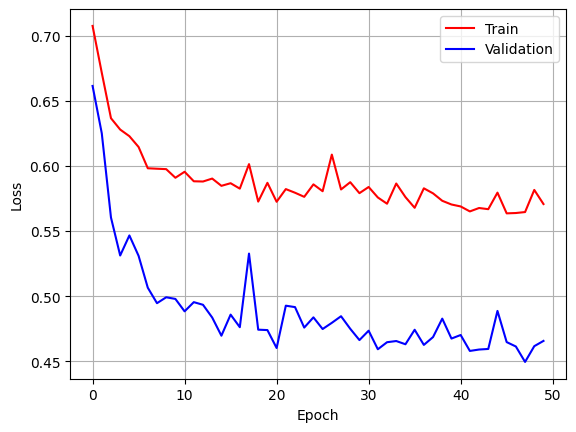

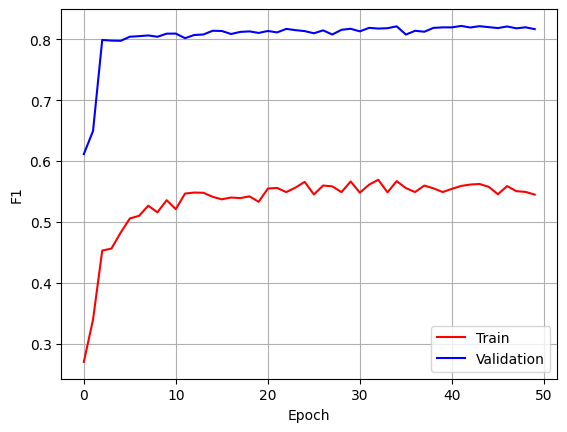

Epoch 0: 100%|██████████| 72/72 [00:01<00:00, 49.25batch/s, F1=23.3, Loss=0.718]


Valid: Loss = 0.6543, F1_Score = 0.6779
Model Saved!



Epoch 1: 100%|██████████| 72/72 [00:01<00:00, 52.03batch/s, F1=36.5, Loss=0.655]


Valid: Loss = 0.5715, F1_Score = 0.7957
Model Saved!



Epoch 2: 100%|██████████| 72/72 [00:01<00:00, 53.38batch/s, F1=47.5, Loss=0.627]


Valid: Loss = 0.5383, F1_Score = 0.7984
Model Saved!



Epoch 3: 100%|██████████| 72/72 [00:01<00:00, 52.98batch/s, F1=50.2, Loss=0.608]


Valid: Loss = 0.5091, F1_Score = 0.7978



Epoch 4: 100%|██████████| 72/72 [00:01<00:00, 52.42batch/s, F1=51, Loss=0.601]


Valid: Loss = 0.4975, F1_Score = 0.797



Epoch 5: 100%|██████████| 72/72 [00:01<00:00, 51.50batch/s, F1=50.6, Loss=0.607]


Valid: Loss = 0.5037, F1_Score = 0.7984



Epoch 6: 100%|██████████| 72/72 [00:01<00:00, 50.03batch/s, F1=53.5, Loss=0.6]


Valid: Loss = 0.5773, F1_Score = 0.7922



Epoch 7: 100%|██████████| 72/72 [00:01<00:00, 46.98batch/s, F1=52.9, Loss=0.604]


Valid: Loss = 0.4924, F1_Score = 0.7985
Model Saved!



Epoch 8: 100%|██████████| 72/72 [00:01<00:00, 49.15batch/s, F1=51.8, Loss=0.596]


Valid: Loss = 0.5058, F1_Score = 0.8007
Model Saved!



Epoch 9: 100%|██████████| 72/72 [00:01<00:00, 52.16batch/s, F1=54.9, Loss=0.598]


Valid: Loss = 0.519, F1_Score = 0.794



Epoch 10: 100%|██████████| 72/72 [00:01<00:00, 48.13batch/s, F1=54.1, Loss=0.586]


Valid: Loss = 0.4913, F1_Score = 0.8038
Model Saved!



Epoch 11: 100%|██████████| 72/72 [00:01<00:00, 50.22batch/s, F1=53.5, Loss=0.584]


Valid: Loss = 0.4921, F1_Score = 0.8049
Model Saved!



Epoch 12: 100%|██████████| 72/72 [00:01<00:00, 53.66batch/s, F1=55, Loss=0.588]


Valid: Loss = 0.4938, F1_Score = 0.8065
Model Saved!



Epoch 13: 100%|██████████| 72/72 [00:01<00:00, 52.26batch/s, F1=54.8, Loss=0.58]


Valid: Loss = 0.5053, F1_Score = 0.8036



Epoch 14: 100%|██████████| 72/72 [00:01<00:00, 50.27batch/s, F1=54.6, Loss=0.582]


Valid: Loss = 0.4994, F1_Score = 0.804



Epoch 15: 100%|██████████| 72/72 [00:01<00:00, 47.85batch/s, F1=55.3, Loss=0.588]


Valid: Loss = 0.499, F1_Score = 0.8077
Model Saved!



Epoch 16: 100%|██████████| 72/72 [00:01<00:00, 55.03batch/s, F1=54.4, Loss=0.575]


Valid: Loss = 0.4889, F1_Score = 0.8132
Model Saved!



Epoch 17: 100%|██████████| 72/72 [00:01<00:00, 49.39batch/s, F1=54.2, Loss=0.578]


Valid: Loss = 0.4876, F1_Score = 0.806



Epoch 18: 100%|██████████| 72/72 [00:01<00:00, 50.11batch/s, F1=54.7, Loss=0.583]


Valid: Loss = 0.4851, F1_Score = 0.8108



Epoch 19: 100%|██████████| 72/72 [00:01<00:00, 49.47batch/s, F1=54.1, Loss=0.587]


Valid: Loss = 0.4958, F1_Score = 0.8143
Model Saved!



Epoch 20: 100%|██████████| 72/72 [00:01<00:00, 47.24batch/s, F1=54.9, Loss=0.586]


Valid: Loss = 0.4994, F1_Score = 0.8093



Epoch 21: 100%|██████████| 72/72 [00:01<00:00, 47.78batch/s, F1=53.8, Loss=0.606]


Valid: Loss = 0.4983, F1_Score = 0.81



Epoch 22: 100%|██████████| 72/72 [00:01<00:00, 49.86batch/s, F1=55.8, Loss=0.585]


Valid: Loss = 0.5002, F1_Score = 0.805



Epoch 23: 100%|██████████| 72/72 [00:01<00:00, 50.44batch/s, F1=56.2, Loss=0.574]


Valid: Loss = 0.4817, F1_Score = 0.8051



Epoch 24: 100%|██████████| 72/72 [00:01<00:00, 52.14batch/s, F1=55.4, Loss=0.579]


Valid: Loss = 0.4883, F1_Score = 0.8048



Epoch 25: 100%|██████████| 72/72 [00:01<00:00, 53.41batch/s, F1=55, Loss=0.58]


Valid: Loss = 0.4953, F1_Score = 0.8113



Epoch 26: 100%|██████████| 72/72 [00:01<00:00, 50.84batch/s, F1=55.4, Loss=0.573]


Valid: Loss = 0.4846, F1_Score = 0.815
Model Saved!



Epoch 27: 100%|██████████| 72/72 [00:01<00:00, 52.48batch/s, F1=54.7, Loss=0.583]


Valid: Loss = 0.4745, F1_Score = 0.8095



Epoch 28: 100%|██████████| 72/72 [00:01<00:00, 49.48batch/s, F1=55.7, Loss=0.572]


Valid: Loss = 0.4705, F1_Score = 0.8078



Epoch 29: 100%|██████████| 72/72 [00:01<00:00, 48.67batch/s, F1=55.6, Loss=0.568]


Valid: Loss = 0.474, F1_Score = 0.8139



Epoch 30: 100%|██████████| 72/72 [00:01<00:00, 50.14batch/s, F1=54.7, Loss=0.595]


Valid: Loss = 0.4713, F1_Score = 0.8142



Epoch 31: 100%|██████████| 72/72 [00:01<00:00, 49.84batch/s, F1=54.1, Loss=0.58]


Valid: Loss = 0.4839, F1_Score = 0.8132



Epoch 32: 100%|██████████| 72/72 [00:01<00:00, 48.58batch/s, F1=55.7, Loss=0.571]


Valid: Loss = 0.4848, F1_Score = 0.8081



Epoch 33: 100%|██████████| 72/72 [00:01<00:00, 49.39batch/s, F1=56, Loss=0.571]


Valid: Loss = 0.467, F1_Score = 0.7955



Epoch 34: 100%|██████████| 72/72 [00:01<00:00, 53.38batch/s, F1=54.9, Loss=0.59]


Valid: Loss = 0.4703, F1_Score = 0.8151
Model Saved!



Epoch 35: 100%|██████████| 72/72 [00:01<00:00, 51.25batch/s, F1=56.1, Loss=0.6]


Valid: Loss = 0.4789, F1_Score = 0.8117



Epoch 36: 100%|██████████| 72/72 [00:01<00:00, 50.73batch/s, F1=54.7, Loss=0.581]


Valid: Loss = 0.484, F1_Score = 0.8146



Epoch 37: 100%|██████████| 72/72 [00:01<00:00, 52.81batch/s, F1=56.8, Loss=0.566]


Valid: Loss = 0.4719, F1_Score = 0.8151
Model Saved!



Epoch 38: 100%|██████████| 72/72 [00:01<00:00, 49.42batch/s, F1=54.5, Loss=0.577]


Valid: Loss = 0.4732, F1_Score = 0.815



Epoch 39: 100%|██████████| 72/72 [00:01<00:00, 53.61batch/s, F1=56.1, Loss=0.567]


Valid: Loss = 0.4567, F1_Score = 0.8138



Epoch 40: 100%|██████████| 72/72 [00:01<00:00, 51.63batch/s, F1=55.5, Loss=0.563]


Valid: Loss = 0.4746, F1_Score = 0.8113



Epoch 41: 100%|██████████| 72/72 [00:01<00:00, 50.38batch/s, F1=55.2, Loss=0.572]


Valid: Loss = 0.4637, F1_Score = 0.8107



Epoch 42: 100%|██████████| 72/72 [00:01<00:00, 46.70batch/s, F1=56, Loss=0.562]


Valid: Loss = 0.4754, F1_Score = 0.8177
Model Saved!



Epoch 43: 100%|██████████| 72/72 [00:01<00:00, 49.21batch/s, F1=55.5, Loss=0.573]


Valid: Loss = 0.4695, F1_Score = 0.8139



Epoch 44: 100%|██████████| 72/72 [00:01<00:00, 47.35batch/s, F1=56.3, Loss=0.566]


Valid: Loss = 0.4644, F1_Score = 0.8162



Epoch 45: 100%|██████████| 72/72 [00:01<00:00, 51.99batch/s, F1=55, Loss=0.567]


Valid: Loss = 0.4636, F1_Score = 0.816



Epoch 46: 100%|██████████| 72/72 [00:01<00:00, 53.58batch/s, F1=55.2, Loss=0.584]


Valid: Loss = 0.4506, F1_Score = 0.8157



Epoch 47: 100%|██████████| 72/72 [00:01<00:00, 50.11batch/s, F1=55.6, Loss=0.58]


Valid: Loss = 0.4976, F1_Score = 0.7992



Epoch 48: 100%|██████████| 72/72 [00:01<00:00, 50.96batch/s, F1=54.8, Loss=0.58]


Valid: Loss = 0.4974, F1_Score = 0.8021



Epoch 49: 100%|██████████| 72/72 [00:01<00:00, 50.28batch/s, F1=54.2, Loss=0.582]


Valid: Loss = 0.4677, F1_Score = 0.8071



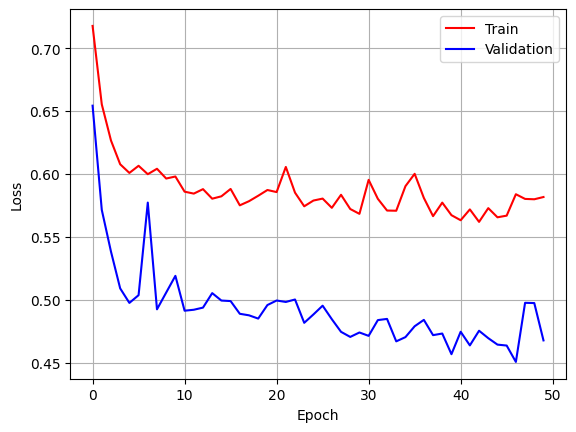

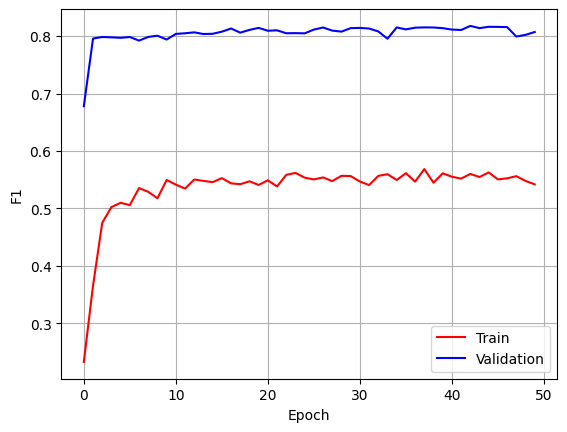

Epoch 0: 100%|██████████| 72/72 [00:01<00:00, 54.60batch/s, F1=34.5, Loss=0.698]


Valid: Loss = 0.6683, F1_Score = 0.7732
Model Saved!



Epoch 1: 100%|██████████| 72/72 [00:01<00:00, 49.64batch/s, F1=48.9, Loss=0.649]


Valid: Loss = 0.5576, F1_Score = 0.7988
Model Saved!



Epoch 2: 100%|██████████| 72/72 [00:01<00:00, 52.61batch/s, F1=54.4, Loss=0.625]


Valid: Loss = 0.5435, F1_Score = 0.8038
Model Saved!



Epoch 3: 100%|██████████| 72/72 [00:01<00:00, 47.77batch/s, F1=53.7, Loss=0.623]


Valid: Loss = 0.5199, F1_Score = 0.8053
Model Saved!



Epoch 4: 100%|██████████| 72/72 [00:01<00:00, 49.43batch/s, F1=55.5, Loss=0.613]


Valid: Loss = 0.5314, F1_Score = 0.8015



Epoch 5: 100%|██████████| 72/72 [00:01<00:00, 48.66batch/s, F1=55.7, Loss=0.608]


Valid: Loss = 0.5067, F1_Score = 0.8069
Model Saved!



Epoch 6: 100%|██████████| 72/72 [00:01<00:00, 54.17batch/s, F1=55.3, Loss=0.598]


Valid: Loss = 0.5124, F1_Score = 0.7997



Epoch 7: 100%|██████████| 72/72 [00:01<00:00, 51.95batch/s, F1=56, Loss=0.596]


Valid: Loss = 0.5308, F1_Score = 0.7902



Epoch 8: 100%|██████████| 72/72 [00:01<00:00, 57.07batch/s, F1=54.6, Loss=0.614]


Valid: Loss = 0.532, F1_Score = 0.8087
Model Saved!



Epoch 9: 100%|██████████| 72/72 [00:01<00:00, 49.94batch/s, F1=55.2, Loss=0.593]


Valid: Loss = 0.486, F1_Score = 0.8119
Model Saved!



Epoch 10: 100%|██████████| 72/72 [00:01<00:00, 54.04batch/s, F1=54.3, Loss=0.6]


Valid: Loss = 0.5162, F1_Score = 0.8021



Epoch 11: 100%|██████████| 72/72 [00:01<00:00, 56.65batch/s, F1=54.4, Loss=0.589]


Valid: Loss = 0.5008, F1_Score = 0.8026



Epoch 12: 100%|██████████| 72/72 [00:01<00:00, 54.14batch/s, F1=55.5, Loss=0.588]


Valid: Loss = 0.4852, F1_Score = 0.8143
Model Saved!



Epoch 13: 100%|██████████| 72/72 [00:01<00:00, 54.49batch/s, F1=55.3, Loss=0.592]


Valid: Loss = 0.5019, F1_Score = 0.8039



Epoch 14: 100%|██████████| 72/72 [00:01<00:00, 50.91batch/s, F1=55.5, Loss=0.591]


Valid: Loss = 0.5097, F1_Score = 0.8033



Epoch 15: 100%|██████████| 72/72 [00:01<00:00, 48.32batch/s, F1=56.1, Loss=0.584]


Valid: Loss = 0.4863, F1_Score = 0.8125



Epoch 16: 100%|██████████| 72/72 [00:01<00:00, 48.23batch/s, F1=55.1, Loss=0.588]


Valid: Loss = 0.4774, F1_Score = 0.8144
Model Saved!



Epoch 17: 100%|██████████| 72/72 [00:01<00:00, 48.51batch/s, F1=56.2, Loss=0.585]


Valid: Loss = 0.495, F1_Score = 0.8092



Epoch 18: 100%|██████████| 72/72 [00:01<00:00, 55.63batch/s, F1=55.6, Loss=0.596]


Valid: Loss = 0.4739, F1_Score = 0.8172
Model Saved!



Epoch 19: 100%|██████████| 72/72 [00:01<00:00, 55.87batch/s, F1=53, Loss=0.594]


Valid: Loss = 0.4898, F1_Score = 0.8139



Epoch 20: 100%|██████████| 72/72 [00:01<00:00, 50.51batch/s, F1=54.2, Loss=0.596]


Valid: Loss = 0.4958, F1_Score = 0.8081



Epoch 21: 100%|██████████| 72/72 [00:01<00:00, 53.41batch/s, F1=55.2, Loss=0.586]


Valid: Loss = 0.4854, F1_Score = 0.8159



Epoch 22: 100%|██████████| 72/72 [00:01<00:00, 52.26batch/s, F1=54.8, Loss=0.59]


Valid: Loss = 0.4849, F1_Score = 0.8135



Epoch 23: 100%|██████████| 72/72 [00:01<00:00, 51.84batch/s, F1=55.3, Loss=0.588]


Valid: Loss = 0.4802, F1_Score = 0.8117



Epoch 24: 100%|██████████| 72/72 [00:01<00:00, 46.77batch/s, F1=54.7, Loss=0.595]


Valid: Loss = 0.4918, F1_Score = 0.8182
Model Saved!



Epoch 25: 100%|██████████| 72/72 [00:01<00:00, 48.77batch/s, F1=54.6, Loss=0.585]


Valid: Loss = 0.48, F1_Score = 0.8157



Epoch 26: 100%|██████████| 72/72 [00:01<00:00, 49.20batch/s, F1=54.5, Loss=0.58]


Valid: Loss = 0.4767, F1_Score = 0.8144



Epoch 27: 100%|██████████| 72/72 [00:01<00:00, 49.55batch/s, F1=54.7, Loss=0.582]


Valid: Loss = 0.4927, F1_Score = 0.8133



Epoch 28: 100%|██████████| 72/72 [00:01<00:00, 47.74batch/s, F1=53.8, Loss=0.58]


Valid: Loss = 0.4917, F1_Score = 0.8141



Epoch 29: 100%|██████████| 72/72 [00:01<00:00, 52.88batch/s, F1=54.9, Loss=0.583]


Valid: Loss = 0.4681, F1_Score = 0.815



Epoch 30: 100%|██████████| 72/72 [00:01<00:00, 55.34batch/s, F1=55.9, Loss=0.584]


Valid: Loss = 0.4644, F1_Score = 0.8164



Epoch 31: 100%|██████████| 72/72 [00:01<00:00, 55.04batch/s, F1=55.2, Loss=0.582]


Valid: Loss = 0.4809, F1_Score = 0.8117



Epoch 32: 100%|██████████| 72/72 [00:01<00:00, 57.10batch/s, F1=55.3, Loss=0.574]


Valid: Loss = 0.4671, F1_Score = 0.8151



Epoch 33: 100%|██████████| 72/72 [00:01<00:00, 55.58batch/s, F1=55, Loss=0.579]


Valid: Loss = 0.4564, F1_Score = 0.8157



Epoch 34: 100%|██████████| 72/72 [00:01<00:00, 55.37batch/s, F1=56, Loss=0.583]


Valid: Loss = 0.4589, F1_Score = 0.8148



Epoch 35: 100%|██████████| 72/72 [00:01<00:00, 54.59batch/s, F1=56.7, Loss=0.58]


Valid: Loss = 0.467, F1_Score = 0.8216
Model Saved!



Epoch 36: 100%|██████████| 72/72 [00:01<00:00, 55.75batch/s, F1=54.6, Loss=0.58]


Valid: Loss = 0.4846, F1_Score = 0.8129



Epoch 37: 100%|██████████| 72/72 [00:01<00:00, 56.84batch/s, F1=54.7, Loss=0.576]


Valid: Loss = 0.4714, F1_Score = 0.8184



Epoch 38: 100%|██████████| 72/72 [00:01<00:00, 52.12batch/s, F1=55.4, Loss=0.572]


Valid: Loss = 0.4754, F1_Score = 0.8241
Model Saved!



Epoch 39: 100%|██████████| 72/72 [00:01<00:00, 54.03batch/s, F1=55.7, Loss=0.572]


Valid: Loss = 0.4648, F1_Score = 0.8214



Epoch 40: 100%|██████████| 72/72 [00:01<00:00, 54.96batch/s, F1=55.5, Loss=0.571]


Valid: Loss = 0.4802, F1_Score = 0.8165



Epoch 41: 100%|██████████| 72/72 [00:01<00:00, 48.54batch/s, F1=55.8, Loss=0.582]


Valid: Loss = 0.4706, F1_Score = 0.8182



Epoch 42: 100%|██████████| 72/72 [00:01<00:00, 51.93batch/s, F1=55.6, Loss=0.583]


Valid: Loss = 0.4954, F1_Score = 0.8203



Epoch 43: 100%|██████████| 72/72 [00:01<00:00, 52.39batch/s, F1=56.1, Loss=0.57]


Valid: Loss = 0.4596, F1_Score = 0.8155



Epoch 44: 100%|██████████| 72/72 [00:01<00:00, 54.04batch/s, F1=54.3, Loss=0.576]


Valid: Loss = 0.4677, F1_Score = 0.8227



Epoch 45: 100%|██████████| 72/72 [00:01<00:00, 56.10batch/s, F1=56.5, Loss=0.567]


Valid: Loss = 0.4585, F1_Score = 0.8239



Epoch 46: 100%|██████████| 72/72 [00:01<00:00, 57.93batch/s, F1=53.7, Loss=0.583]


Valid: Loss = 0.4716, F1_Score = 0.8244
Model Saved!



Epoch 47: 100%|██████████| 72/72 [00:01<00:00, 51.95batch/s, F1=55.7, Loss=0.571]


Valid: Loss = 0.4769, F1_Score = 0.8225



Epoch 48: 100%|██████████| 72/72 [00:01<00:00, 51.55batch/s, F1=54.5, Loss=0.595]


Valid: Loss = 0.4495, F1_Score = 0.8222



Epoch 49: 100%|██████████| 72/72 [00:01<00:00, 49.16batch/s, F1=54.8, Loss=0.599]


Valid: Loss = 0.4817, F1_Score = 0.8137



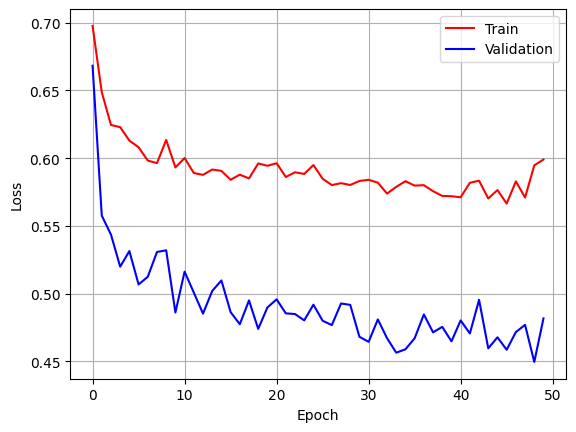

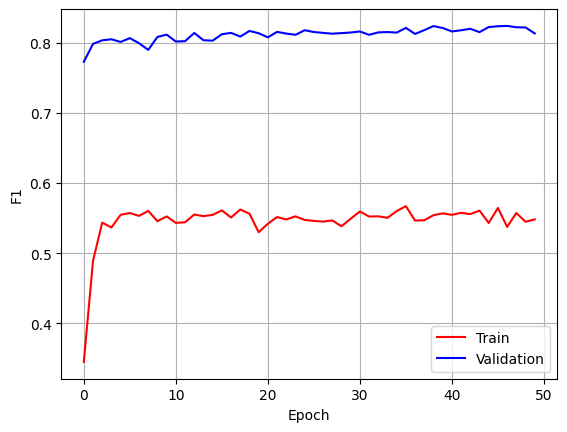

Epoch 0: 100%|██████████| 72/72 [00:01<00:00, 51.61batch/s, F1=43.1, Loss=0.709]


Valid: Loss = 0.6636, F1_Score = 0.7346
Model Saved!



Epoch 1: 100%|██████████| 72/72 [00:01<00:00, 48.68batch/s, F1=49, Loss=0.655]


Valid: Loss = 0.569, F1_Score = 0.786
Model Saved!



Epoch 2: 100%|██████████| 72/72 [00:01<00:00, 47.71batch/s, F1=52.9, Loss=0.624]


Valid: Loss = 0.5465, F1_Score = 0.7835



Epoch 3: 100%|██████████| 72/72 [00:01<00:00, 53.27batch/s, F1=54, Loss=0.621]


Valid: Loss = 0.555, F1_Score = 0.783



Epoch 4: 100%|██████████| 72/72 [00:01<00:00, 52.96batch/s, F1=54.8, Loss=0.606]


Valid: Loss = 0.5275, F1_Score = 0.7956
Model Saved!



Epoch 5: 100%|██████████| 72/72 [00:01<00:00, 51.79batch/s, F1=55.4, Loss=0.608]


Valid: Loss = 0.5172, F1_Score = 0.7994
Model Saved!



Epoch 6: 100%|██████████| 72/72 [00:01<00:00, 51.09batch/s, F1=55.1, Loss=0.608]


Valid: Loss = 0.5155, F1_Score = 0.8052
Model Saved!



Epoch 7: 100%|██████████| 72/72 [00:01<00:00, 53.08batch/s, F1=54.2, Loss=0.602]


Valid: Loss = 0.5138, F1_Score = 0.802



Epoch 8: 100%|██████████| 72/72 [00:01<00:00, 53.12batch/s, F1=55.1, Loss=0.598]


Valid: Loss = 0.5033, F1_Score = 0.8029



Epoch 9: 100%|██████████| 72/72 [00:01<00:00, 50.44batch/s, F1=55.6, Loss=0.602]


Valid: Loss = 0.5235, F1_Score = 0.7964



Epoch 10: 100%|██████████| 72/72 [00:01<00:00, 49.18batch/s, F1=54.2, Loss=0.601]


Valid: Loss = 0.5016, F1_Score = 0.804



Epoch 11: 100%|██████████| 72/72 [00:01<00:00, 51.67batch/s, F1=53.9, Loss=0.597]


Valid: Loss = 0.4905, F1_Score = 0.806
Model Saved!



Epoch 12: 100%|██████████| 72/72 [00:01<00:00, 50.79batch/s, F1=53.9, Loss=0.601]


Valid: Loss = 0.4954, F1_Score = 0.8061
Model Saved!



Epoch 13: 100%|██████████| 72/72 [00:01<00:00, 51.65batch/s, F1=54.3, Loss=0.585]


Valid: Loss = 0.4888, F1_Score = 0.8032



Epoch 14: 100%|██████████| 72/72 [00:01<00:00, 52.14batch/s, F1=54.3, Loss=0.587]


Valid: Loss = 0.4894, F1_Score = 0.8003



Epoch 15: 100%|██████████| 72/72 [00:01<00:00, 57.67batch/s, F1=55.6, Loss=0.588]


Valid: Loss = 0.4801, F1_Score = 0.8091
Model Saved!



Epoch 16: 100%|██████████| 72/72 [00:01<00:00, 56.68batch/s, F1=54.4, Loss=0.592]


Valid: Loss = 0.5032, F1_Score = 0.8055



Epoch 17: 100%|██████████| 72/72 [00:01<00:00, 57.85batch/s, F1=53.6, Loss=0.597]


Valid: Loss = 0.4883, F1_Score = 0.8104
Model Saved!



Epoch 18: 100%|██████████| 72/72 [00:01<00:00, 56.20batch/s, F1=55.3, Loss=0.602]


Valid: Loss = 0.5042, F1_Score = 0.8103



Epoch 19: 100%|██████████| 72/72 [00:01<00:00, 56.20batch/s, F1=54.9, Loss=0.584]


Valid: Loss = 0.5034, F1_Score = 0.8098



Epoch 20: 100%|██████████| 72/72 [00:01<00:00, 56.23batch/s, F1=55, Loss=0.588]


Valid: Loss = 0.4948, F1_Score = 0.8112
Model Saved!



Epoch 21: 100%|██████████| 72/72 [00:01<00:00, 53.16batch/s, F1=56.1, Loss=0.578]


Valid: Loss = 0.4818, F1_Score = 0.8079



Epoch 22: 100%|██████████| 72/72 [00:01<00:00, 49.39batch/s, F1=55.8, Loss=0.593]


Valid: Loss = 0.4822, F1_Score = 0.8131
Model Saved!



Epoch 23: 100%|██████████| 72/72 [00:01<00:00, 48.08batch/s, F1=55.9, Loss=0.605]


Valid: Loss = 0.4865, F1_Score = 0.8063



Epoch 24: 100%|██████████| 72/72 [00:01<00:00, 48.10batch/s, F1=55, Loss=0.587]


Valid: Loss = 0.481, F1_Score = 0.8104



Epoch 25: 100%|██████████| 72/72 [00:01<00:00, 51.28batch/s, F1=55.7, Loss=0.583]


Valid: Loss = 0.4754, F1_Score = 0.8119



Epoch 26: 100%|██████████| 72/72 [00:01<00:00, 48.29batch/s, F1=54.3, Loss=0.589]


Valid: Loss = 0.4876, F1_Score = 0.8147
Model Saved!



Epoch 27: 100%|██████████| 72/72 [00:01<00:00, 54.13batch/s, F1=56.6, Loss=0.577]


Valid: Loss = 0.489, F1_Score = 0.8077



Epoch 28: 100%|██████████| 72/72 [00:01<00:00, 57.40batch/s, F1=55, Loss=0.583]


Valid: Loss = 0.4776, F1_Score = 0.8167
Model Saved!



Epoch 29: 100%|██████████| 72/72 [00:01<00:00, 51.54batch/s, F1=54.6, Loss=0.589]


Valid: Loss = 0.4818, F1_Score = 0.8162



Epoch 30: 100%|██████████| 72/72 [00:01<00:00, 52.34batch/s, F1=54.2, Loss=0.615]


Valid: Loss = 0.4977, F1_Score = 0.8075



Epoch 31: 100%|██████████| 72/72 [00:01<00:00, 53.16batch/s, F1=55.6, Loss=0.593]


Valid: Loss = 0.4701, F1_Score = 0.8127



Epoch 32: 100%|██████████| 72/72 [00:01<00:00, 50.97batch/s, F1=54.4, Loss=0.595]


Valid: Loss = 0.4872, F1_Score = 0.8074



Epoch 33: 100%|██████████| 72/72 [00:01<00:00, 52.37batch/s, F1=55.3, Loss=0.58]


Valid: Loss = 0.4722, F1_Score = 0.8104



Epoch 34: 100%|██████████| 72/72 [00:01<00:00, 46.48batch/s, F1=54, Loss=0.598]


Valid: Loss = 0.4908, F1_Score = 0.8195
Model Saved!



Epoch 35: 100%|██████████| 72/72 [00:01<00:00, 48.11batch/s, F1=55.1, Loss=0.585]


Valid: Loss = 0.4933, F1_Score = 0.8099



Epoch 36: 100%|██████████| 72/72 [00:01<00:00, 52.66batch/s, F1=55.6, Loss=0.571]


Valid: Loss = 0.4674, F1_Score = 0.8109



Epoch 37: 100%|██████████| 72/72 [00:01<00:00, 49.87batch/s, F1=55.1, Loss=0.583]


Valid: Loss = 0.473, F1_Score = 0.812



Epoch 38: 100%|██████████| 72/72 [00:01<00:00, 50.71batch/s, F1=55.9, Loss=0.589]


Valid: Loss = 0.4839, F1_Score = 0.8107



Epoch 39: 100%|██████████| 72/72 [00:01<00:00, 53.82batch/s, F1=55.4, Loss=0.586]


Valid: Loss = 0.4728, F1_Score = 0.8117



Epoch 40: 100%|██████████| 72/72 [00:01<00:00, 55.73batch/s, F1=53.9, Loss=0.584]


Valid: Loss = 0.4684, F1_Score = 0.8132



Epoch 41: 100%|██████████| 72/72 [00:01<00:00, 51.18batch/s, F1=54.9, Loss=0.581]


Valid: Loss = 0.4736, F1_Score = 0.8147



Epoch 42: 100%|██████████| 72/72 [00:01<00:00, 50.69batch/s, F1=54.8, Loss=0.592]


Valid: Loss = 0.4843, F1_Score = 0.8124



Epoch 43: 100%|██████████| 72/72 [00:01<00:00, 51.92batch/s, F1=55.2, Loss=0.581]


Valid: Loss = 0.4846, F1_Score = 0.8118



Epoch 44: 100%|██████████| 72/72 [00:01<00:00, 48.53batch/s, F1=57, Loss=0.584]


Valid: Loss = 0.4707, F1_Score = 0.8141



Epoch 45: 100%|██████████| 72/72 [00:01<00:00, 48.67batch/s, F1=53.3, Loss=0.592]


Valid: Loss = 0.4788, F1_Score = 0.8072



Epoch 46: 100%|██████████| 72/72 [00:01<00:00, 51.42batch/s, F1=56, Loss=0.575]


Valid: Loss = 0.485, F1_Score = 0.8112



Epoch 47: 100%|██████████| 72/72 [00:01<00:00, 55.57batch/s, F1=55.3, Loss=0.582]


Valid: Loss = 0.4652, F1_Score = 0.8137



Epoch 48: 100%|██████████| 72/72 [00:01<00:00, 53.72batch/s, F1=54, Loss=0.574]


Valid: Loss = 0.4697, F1_Score = 0.8152



Epoch 49: 100%|██████████| 72/72 [00:01<00:00, 47.76batch/s, F1=55.1, Loss=0.583]


Valid: Loss = 0.4625, F1_Score = 0.8105



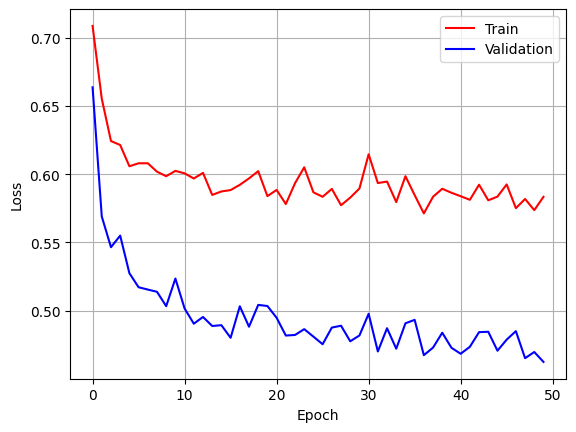

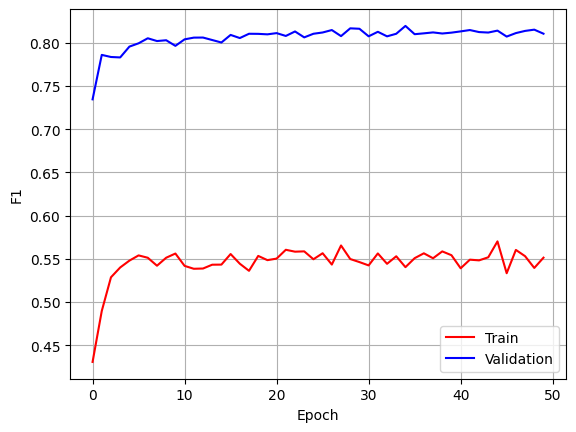

Epoch 0: 100%|██████████| 72/72 [00:01<00:00, 50.46batch/s, F1=38, Loss=0.698]


Valid: Loss = 0.6739, F1_Score = 0.7377
Model Saved!



Epoch 1: 100%|██████████| 72/72 [00:01<00:00, 52.90batch/s, F1=48.6, Loss=0.657]


Valid: Loss = 0.572, F1_Score = 0.7914
Model Saved!



Epoch 2: 100%|██████████| 72/72 [00:01<00:00, 50.19batch/s, F1=51.8, Loss=0.62]


Valid: Loss = 0.5275, F1_Score = 0.8013
Model Saved!



Epoch 3: 100%|██████████| 72/72 [00:02<00:00, 30.92batch/s, F1=52.6, Loss=0.623]


Valid: Loss = 0.5217, F1_Score = 0.8069
Model Saved!



Epoch 4: 100%|██████████| 72/72 [00:01<00:00, 52.66batch/s, F1=54.6, Loss=0.611]


Valid: Loss = 0.5082, F1_Score = 0.8051



Epoch 5: 100%|██████████| 72/72 [00:01<00:00, 50.35batch/s, F1=53.8, Loss=0.618]


Valid: Loss = 0.5327, F1_Score = 0.8051



Epoch 6: 100%|██████████| 72/72 [00:01<00:00, 49.43batch/s, F1=54.3, Loss=0.612]


Valid: Loss = 0.5123, F1_Score = 0.8044



Epoch 7: 100%|██████████| 72/72 [00:01<00:00, 50.16batch/s, F1=54.3, Loss=0.608]


Valid: Loss = 0.5203, F1_Score = 0.805



Epoch 8: 100%|██████████| 72/72 [00:01<00:00, 52.63batch/s, F1=55.5, Loss=0.61]


Valid: Loss = 0.5132, F1_Score = 0.8056



Epoch 9: 100%|██████████| 72/72 [00:01<00:00, 49.51batch/s, F1=54.1, Loss=0.604]


Valid: Loss = 0.4951, F1_Score = 0.806



Epoch 10: 100%|██████████| 72/72 [00:01<00:00, 53.28batch/s, F1=55.1, Loss=0.606]


Valid: Loss = 0.537, F1_Score = 0.7917



Epoch 11: 100%|██████████| 72/72 [00:01<00:00, 55.34batch/s, F1=55.3, Loss=0.59]


Valid: Loss = 0.493, F1_Score = 0.8088
Model Saved!



Epoch 12: 100%|██████████| 72/72 [00:01<00:00, 55.68batch/s, F1=53.8, Loss=0.588]


Valid: Loss = 0.4851, F1_Score = 0.8086



Epoch 13: 100%|██████████| 72/72 [00:01<00:00, 57.33batch/s, F1=54.4, Loss=0.586]


Valid: Loss = 0.4949, F1_Score = 0.8087



Epoch 14: 100%|██████████| 72/72 [00:01<00:00, 52.84batch/s, F1=54.9, Loss=0.589]


Valid: Loss = 0.4921, F1_Score = 0.8107
Model Saved!



Epoch 15: 100%|██████████| 72/72 [00:01<00:00, 50.79batch/s, F1=54.8, Loss=0.594]


Valid: Loss = 0.4943, F1_Score = 0.8108
Model Saved!



Epoch 16: 100%|██████████| 72/72 [00:01<00:00, 53.63batch/s, F1=54.5, Loss=0.589]


Valid: Loss = 0.4821, F1_Score = 0.8157
Model Saved!



Epoch 17: 100%|██████████| 72/72 [00:01<00:00, 49.68batch/s, F1=54.9, Loss=0.587]


Valid: Loss = 0.4874, F1_Score = 0.8152



Epoch 18: 100%|██████████| 72/72 [00:01<00:00, 54.31batch/s, F1=56.1, Loss=0.579]


Valid: Loss = 0.4742, F1_Score = 0.8164
Model Saved!



Epoch 19: 100%|██████████| 72/72 [00:01<00:00, 49.69batch/s, F1=53.9, Loss=0.586]


Valid: Loss = 0.4814, F1_Score = 0.8142



Epoch 20: 100%|██████████| 72/72 [00:01<00:00, 49.15batch/s, F1=54.5, Loss=0.58]


Valid: Loss = 0.4653, F1_Score = 0.8165
Model Saved!



Epoch 21: 100%|██████████| 72/72 [00:01<00:00, 47.58batch/s, F1=55.8, Loss=0.591]


Valid: Loss = 0.4682, F1_Score = 0.8121



Epoch 22: 100%|██████████| 72/72 [00:01<00:00, 54.53batch/s, F1=55.8, Loss=0.582]


Valid: Loss = 0.4952, F1_Score = 0.8141



Epoch 23: 100%|██████████| 72/72 [00:01<00:00, 52.50batch/s, F1=54.7, Loss=0.593]


Valid: Loss = 0.4666, F1_Score = 0.8128



Epoch 24: 100%|██████████| 72/72 [00:01<00:00, 51.46batch/s, F1=55, Loss=0.595]


Valid: Loss = 0.4986, F1_Score = 0.8135



Epoch 25: 100%|██████████| 72/72 [00:01<00:00, 56.42batch/s, F1=55.8, Loss=0.577]


Valid: Loss = 0.4742, F1_Score = 0.8146



Epoch 26: 100%|██████████| 72/72 [00:01<00:00, 55.69batch/s, F1=54.5, Loss=0.582]


Valid: Loss = 0.4725, F1_Score = 0.8201
Model Saved!



Epoch 27: 100%|██████████| 72/72 [00:01<00:00, 53.38batch/s, F1=56.2, Loss=0.584]


Valid: Loss = 0.4716, F1_Score = 0.8192



Epoch 28: 100%|██████████| 72/72 [00:01<00:00, 52.87batch/s, F1=53.7, Loss=0.585]


Valid: Loss = 0.4726, F1_Score = 0.8204
Model Saved!



Epoch 29: 100%|██████████| 72/72 [00:01<00:00, 54.52batch/s, F1=55.7, Loss=0.577]


Valid: Loss = 0.4946, F1_Score = 0.8206
Model Saved!



Epoch 30: 100%|██████████| 72/72 [00:01<00:00, 52.72batch/s, F1=55, Loss=0.584]


Valid: Loss = 0.4729, F1_Score = 0.8152



Epoch 31: 100%|██████████| 72/72 [00:01<00:00, 48.50batch/s, F1=54.6, Loss=0.58]


Valid: Loss = 0.4671, F1_Score = 0.821
Model Saved!



Epoch 32: 100%|██████████| 72/72 [00:01<00:00, 48.05batch/s, F1=57, Loss=0.565]


Valid: Loss = 0.4568, F1_Score = 0.8269
Model Saved!



Epoch 33: 100%|██████████| 72/72 [00:01<00:00, 49.08batch/s, F1=55.2, Loss=0.578]


Valid: Loss = 0.4693, F1_Score = 0.8207



Epoch 34: 100%|██████████| 72/72 [00:01<00:00, 53.27batch/s, F1=54, Loss=0.588]


Valid: Loss = 0.4674, F1_Score = 0.8167



Epoch 35: 100%|██████████| 72/72 [00:01<00:00, 54.72batch/s, F1=53.9, Loss=0.591]


Valid: Loss = 0.4762, F1_Score = 0.8211



Epoch 36: 100%|██████████| 72/72 [00:01<00:00, 56.29batch/s, F1=54.3, Loss=0.577]


Valid: Loss = 0.4592, F1_Score = 0.8179



Epoch 37: 100%|██████████| 72/72 [00:01<00:00, 52.79batch/s, F1=54.5, Loss=0.572]


Valid: Loss = 0.4511, F1_Score = 0.8222



Epoch 38: 100%|██████████| 72/72 [00:01<00:00, 54.06batch/s, F1=55.1, Loss=0.573]


Valid: Loss = 0.447, F1_Score = 0.8246



Epoch 39: 100%|██████████| 72/72 [00:01<00:00, 51.74batch/s, F1=56.9, Loss=0.576]


Valid: Loss = 0.4644, F1_Score = 0.8228



Epoch 40: 100%|██████████| 72/72 [00:01<00:00, 48.43batch/s, F1=54.3, Loss=0.58]


Valid: Loss = 0.4797, F1_Score = 0.8127



Epoch 41: 100%|██████████| 72/72 [00:01<00:00, 51.30batch/s, F1=54.4, Loss=0.579]


Valid: Loss = 0.4629, F1_Score = 0.8252



Epoch 42: 100%|██████████| 72/72 [00:01<00:00, 50.81batch/s, F1=54.9, Loss=0.574]


Valid: Loss = 0.4635, F1_Score = 0.8265



Epoch 43: 100%|██████████| 72/72 [00:01<00:00, 50.71batch/s, F1=54.3, Loss=0.572]


Valid: Loss = 0.47, F1_Score = 0.8219



Epoch 44: 100%|██████████| 72/72 [00:01<00:00, 48.91batch/s, F1=56.2, Loss=0.563]


Valid: Loss = 0.4592, F1_Score = 0.8237



Epoch 45: 100%|██████████| 72/72 [00:01<00:00, 50.08batch/s, F1=55.7, Loss=0.573]


Valid: Loss = 0.4682, F1_Score = 0.8218



Epoch 46: 100%|██████████| 72/72 [00:01<00:00, 52.11batch/s, F1=56.7, Loss=0.573]


Valid: Loss = 0.458, F1_Score = 0.8244



Epoch 47: 100%|██████████| 72/72 [00:01<00:00, 52.11batch/s, F1=53.5, Loss=0.583]


Valid: Loss = 0.4698, F1_Score = 0.819



Epoch 48: 100%|██████████| 72/72 [00:01<00:00, 54.79batch/s, F1=54.6, Loss=0.573]


Valid: Loss = 0.4574, F1_Score = 0.8237



Epoch 49: 100%|██████████| 72/72 [00:01<00:00, 54.64batch/s, F1=54.7, Loss=0.575]


Valid: Loss = 0.464, F1_Score = 0.8216



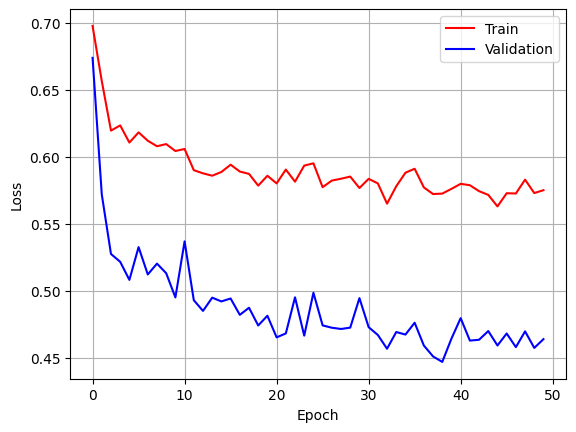

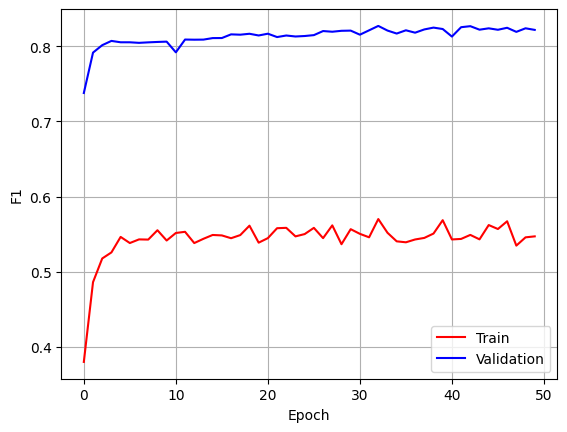

Epoch 0: 100%|██████████| 35/35 [00:00<00:00, 54.47batch/s, F1=42.2, Loss=0.733]


Valid: Loss = 0.6974, F1_Score = 0.0
Model Saved!



Epoch 1: 100%|██████████| 35/35 [00:00<00:00, 55.67batch/s, F1=42.9, Loss=0.699]


Valid: Loss = 0.6778, F1_Score = 0.7137
Model Saved!



Epoch 2: 100%|██████████| 35/35 [00:00<00:00, 52.83batch/s, F1=47.9, Loss=0.676]


Valid: Loss = 0.6332, F1_Score = 0.7306
Model Saved!



Epoch 3: 100%|██████████| 35/35 [00:00<00:00, 49.91batch/s, F1=50.2, Loss=0.665]


Valid: Loss = 0.6181, F1_Score = 0.755
Model Saved!



Epoch 4: 100%|██████████| 35/35 [00:00<00:00, 47.71batch/s, F1=53.4, Loss=0.639]


Valid: Loss = 0.575, F1_Score = 0.7864
Model Saved!



Epoch 5: 100%|██████████| 35/35 [00:00<00:00, 47.53batch/s, F1=52, Loss=0.63]


Valid: Loss = 0.5478, F1_Score = 0.7834



Epoch 6: 100%|██████████| 35/35 [00:00<00:00, 50.47batch/s, F1=53.9, Loss=0.63]


Valid: Loss = 0.5336, F1_Score = 0.7889
Model Saved!



Epoch 7: 100%|██████████| 35/35 [00:00<00:00, 49.66batch/s, F1=56.1, Loss=0.621]


Valid: Loss = 0.5333, F1_Score = 0.7875



Epoch 8: 100%|██████████| 35/35 [00:00<00:00, 46.20batch/s, F1=55.1, Loss=0.606]


Valid: Loss = 0.5176, F1_Score = 0.7927
Model Saved!



Epoch 9: 100%|██████████| 35/35 [00:00<00:00, 46.25batch/s, F1=53.8, Loss=0.616]


Valid: Loss = 0.5421, F1_Score = 0.7855



Epoch 10: 100%|██████████| 35/35 [00:00<00:00, 46.42batch/s, F1=54.5, Loss=0.61]


Valid: Loss = 0.531, F1_Score = 0.7894



Epoch 11: 100%|██████████| 35/35 [00:00<00:00, 49.13batch/s, F1=53.2, Loss=0.611]


Valid: Loss = 0.5202, F1_Score = 0.7925



Epoch 12: 100%|██████████| 35/35 [00:00<00:00, 49.31batch/s, F1=53.3, Loss=0.612]


Valid: Loss = 0.5153, F1_Score = 0.7898



Epoch 13: 100%|██████████| 35/35 [00:00<00:00, 49.74batch/s, F1=55.7, Loss=0.597]


Valid: Loss = 0.5166, F1_Score = 0.7833



Epoch 14: 100%|██████████| 35/35 [00:00<00:00, 52.01batch/s, F1=52.9, Loss=0.599]


Valid: Loss = 0.4995, F1_Score = 0.7948
Model Saved!



Epoch 15: 100%|██████████| 35/35 [00:00<00:00, 53.27batch/s, F1=54.4, Loss=0.599]


Valid: Loss = 0.5116, F1_Score = 0.7966
Model Saved!



Epoch 16: 100%|██████████| 35/35 [00:00<00:00, 50.01batch/s, F1=53.4, Loss=0.592]


Valid: Loss = 0.5019, F1_Score = 0.7936



Epoch 17: 100%|██████████| 35/35 [00:00<00:00, 53.36batch/s, F1=56.4, Loss=0.588]


Valid: Loss = 0.4856, F1_Score = 0.8075
Model Saved!



Epoch 18: 100%|██████████| 35/35 [00:00<00:00, 56.39batch/s, F1=54.9, Loss=0.595]


Valid: Loss = 0.5018, F1_Score = 0.785



Epoch 19: 100%|██████████| 35/35 [00:00<00:00, 52.98batch/s, F1=55.2, Loss=0.591]


Valid: Loss = 0.4993, F1_Score = 0.7966



Epoch 20: 100%|██████████| 35/35 [00:00<00:00, 52.22batch/s, F1=56, Loss=0.598]


Valid: Loss = 0.5057, F1_Score = 0.8012



Epoch 21: 100%|██████████| 35/35 [00:00<00:00, 51.21batch/s, F1=54.7, Loss=0.595]


Valid: Loss = 0.494, F1_Score = 0.7991



Epoch 22: 100%|██████████| 35/35 [00:00<00:00, 52.90batch/s, F1=55.1, Loss=0.594]


Valid: Loss = 0.4938, F1_Score = 0.7994



Epoch 23: 100%|██████████| 35/35 [00:00<00:00, 51.24batch/s, F1=54.2, Loss=0.593]


Valid: Loss = 0.4896, F1_Score = 0.7997



Epoch 24: 100%|██████████| 35/35 [00:00<00:00, 54.86batch/s, F1=51.7, Loss=0.597]


Valid: Loss = 0.5023, F1_Score = 0.8095
Model Saved!



Epoch 25: 100%|██████████| 35/35 [00:00<00:00, 50.68batch/s, F1=53.6, Loss=0.589]


Valid: Loss = 0.4805, F1_Score = 0.806



Epoch 26: 100%|██████████| 35/35 [00:00<00:00, 52.39batch/s, F1=54, Loss=0.588]


Valid: Loss = 0.4862, F1_Score = 0.8019



Epoch 27: 100%|██████████| 35/35 [00:00<00:00, 50.74batch/s, F1=55.8, Loss=0.59]


Valid: Loss = 0.4916, F1_Score = 0.805



Epoch 28: 100%|██████████| 35/35 [00:00<00:00, 48.22batch/s, F1=54.6, Loss=0.592]


Valid: Loss = 0.489, F1_Score = 0.8



Epoch 29: 100%|██████████| 35/35 [00:00<00:00, 48.28batch/s, F1=55.9, Loss=0.581]


Valid: Loss = 0.4799, F1_Score = 0.8099
Model Saved!



Epoch 30: 100%|██████████| 35/35 [00:00<00:00, 47.52batch/s, F1=54.5, Loss=0.599]


Valid: Loss = 0.4986, F1_Score = 0.8041



Epoch 31: 100%|██████████| 35/35 [00:00<00:00, 49.52batch/s, F1=53.9, Loss=0.598]


Valid: Loss = 0.4968, F1_Score = 0.8009



Epoch 32: 100%|██████████| 35/35 [00:00<00:00, 50.29batch/s, F1=56, Loss=0.574]


Valid: Loss = 0.4726, F1_Score = 0.8146
Model Saved!



Epoch 33: 100%|██████████| 35/35 [00:00<00:00, 47.97batch/s, F1=54.4, Loss=0.598]


Valid: Loss = 0.508, F1_Score = 0.8003



Epoch 34: 100%|██████████| 35/35 [00:00<00:00, 49.95batch/s, F1=55.8, Loss=0.584]


Valid: Loss = 0.4818, F1_Score = 0.8016



Epoch 35: 100%|██████████| 35/35 [00:00<00:00, 47.22batch/s, F1=53.9, Loss=0.59]


Valid: Loss = 0.4917, F1_Score = 0.7985



Epoch 36: 100%|██████████| 35/35 [00:00<00:00, 49.68batch/s, F1=53, Loss=0.591]


Valid: Loss = 0.4897, F1_Score = 0.808



Epoch 37: 100%|██████████| 35/35 [00:00<00:00, 53.50batch/s, F1=52.5, Loss=0.588]


Valid: Loss = 0.4877, F1_Score = 0.814



Epoch 38: 100%|██████████| 35/35 [00:00<00:00, 52.20batch/s, F1=55.6, Loss=0.586]


Valid: Loss = 0.4713, F1_Score = 0.8071



Epoch 39: 100%|██████████| 35/35 [00:00<00:00, 52.40batch/s, F1=53.5, Loss=0.583]


Valid: Loss = 0.4833, F1_Score = 0.8095



Epoch 40: 100%|██████████| 35/35 [00:00<00:00, 53.78batch/s, F1=56.6, Loss=0.581]


Valid: Loss = 0.4999, F1_Score = 0.7994



Epoch 41: 100%|██████████| 35/35 [00:00<00:00, 51.36batch/s, F1=56.1, Loss=0.575]


Valid: Loss = 0.4641, F1_Score = 0.8167
Model Saved!



Epoch 42: 100%|██████████| 35/35 [00:00<00:00, 50.04batch/s, F1=52.5, Loss=0.593]


Valid: Loss = 0.4801, F1_Score = 0.816



Epoch 43: 100%|██████████| 35/35 [00:00<00:00, 53.39batch/s, F1=55.5, Loss=0.581]


Valid: Loss = 0.4785, F1_Score = 0.8022



Epoch 44: 100%|██████████| 35/35 [00:00<00:00, 56.97batch/s, F1=55.2, Loss=0.581]


Valid: Loss = 0.4771, F1_Score = 0.8109



Epoch 45: 100%|██████████| 35/35 [00:00<00:00, 56.10batch/s, F1=55.8, Loss=0.574]


Valid: Loss = 0.4742, F1_Score = 0.8118



Epoch 46: 100%|██████████| 35/35 [00:00<00:00, 56.93batch/s, F1=56, Loss=0.579]


Valid: Loss = 0.485, F1_Score = 0.8089



Epoch 47: 100%|██████████| 35/35 [00:00<00:00, 51.69batch/s, F1=55.7, Loss=0.577]


Valid: Loss = 0.4594, F1_Score = 0.8166



Epoch 48: 100%|██████████| 35/35 [00:00<00:00, 48.62batch/s, F1=54.7, Loss=0.576]


Valid: Loss = 0.4715, F1_Score = 0.8122



Epoch 49: 100%|██████████| 35/35 [00:00<00:00, 54.79batch/s, F1=54.4, Loss=0.583]


Valid: Loss = 0.4805, F1_Score = 0.8135



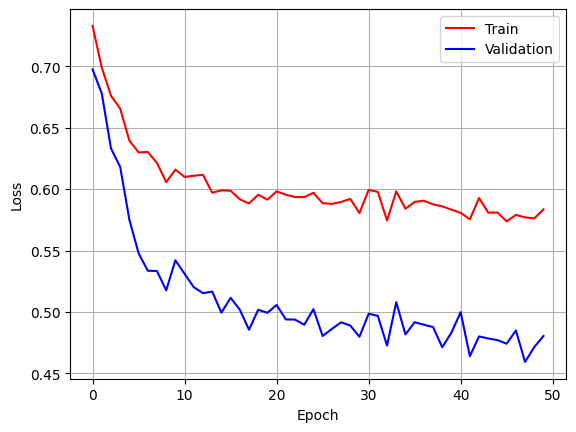

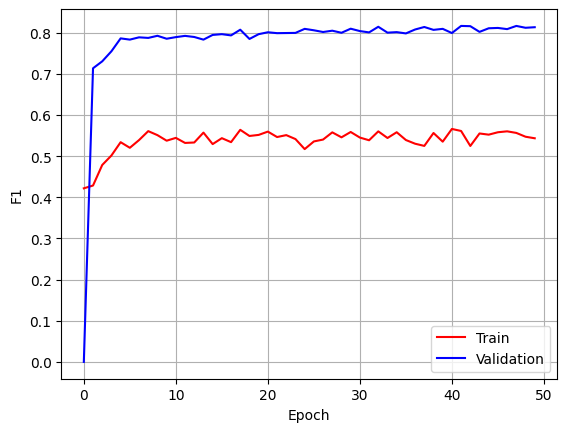

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 500})'''))

metric = BinaryF1Score().to(device)

for i in range(len(bags_x)):
  model = CNNClassifier().to(device)
  lr = 0.001
  opt = optim.Adam(model.parameters(), lr=lr)#, weight_decay=0.0000001
  loss_fn = nn.BCEWithLogitsLoss()

  loss_train_hist = []
  loss_valid_hist = []

  f1_train_hist = []
  f1_valid_hist = []

  best_f1_valid = -torch.inf

  num_epochs = 50

  for epoch in range(num_epochs):
    # Train
    model, loss_train, f1_train ,tempLoss = train_one_epoch(model,
                                                  train_loaders[i],
                                                  loss_fn,
                                                  opt,
                                                  metric,
                                                  epoch)
    # Validation
    loss_valid, f1_valid = evaluate(model,
                                    valid_loaders[i],
                                    loss_fn,
                                    metric)

    #scheduler.step()

    loss_train_hist.append(loss_train)
    loss_valid_hist.append(loss_valid)

    f1_train_hist.append(f1_train)
    f1_valid_hist.append(f1_valid)

    print(f'Valid: Loss = {loss_valid:.4}, F1_Score = {f1_valid:.4}')

    if f1_valid > best_f1_valid:
      torch.save(model, f'/content/drive/MyDrive/Result/Bagging/Fold5/Bagg{i}-model.pt')
      best_f1_valid = f1_valid
      print('Model Saved!')

    print()

  plt.plot(range(num_epochs), loss_train_hist, 'r-', label='Train')
  plt.plot(range(num_epochs), loss_valid_hist, 'b-', label='Validation')

  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend()
  plt.show()

  plt.plot(range(num_epochs), f1_train_hist, 'r-', label='Train')
  plt.plot(range(num_epochs), f1_valid_hist, 'b-', label='Validation')

  plt.xlabel('Epoch')
  plt.ylabel('F1')
  plt.grid(True)
  plt.legend()
  plt.show()

# new test

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def predict(model, num):
  pred_sig = torch.tensor([]).to(device)
  predicted = torch.tensor([]).to(device)
  y_real = torch.tensor([]).to(device)
  with torch.no_grad():
    model.eval()
    for inputs, targets in test_loaders[num]:
      inputs = inputs.to(device)
      targets = targets.to(device)
      inputs = inputs.unsqueeze(1)
      inputs = inputs.float()
      targets = targets.float()

      outputs = model(inputs).squeeze()

      predictions = torch.sigmoid(outputs)
      pred_sig = torch.cat((pred_sig, predictions), dim=0)
      predictions[predictions <= 0.5] = 0
      predictions[predictions > 0.5] = 1
      predicted = torch.cat((predicted, predictions), dim=0)
      y_real = torch.cat((y_real, targets), dim=0)

  return predicted.squeeze(), y_real.squeeze(), pred_sig.squeeze()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

def analysis_model(y_pred, y_test):
  acc = round(accuracy_score(y_test, y_pred), 2)
  f1 = round(f1_score(y_test, y_pred), 2)
  recall = round(recall_score(y_test, y_pred), 2)
  prec = round(precision_score(y_test, y_pred), 2)
  auc = round(roc_auc_score(y_test, y_pred), 2)
  print(f'Accuracy Score: {acc}')
  print(f'F1 Score: {f1}')
  print(f'Recall Score: {recall}')
  print(f'Precision Score: {prec}')
  print(f'ROC AUC: {auc}')

  # Confusion Matrix
  conf_mat = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

  FPr = round((conf_mat[0][1] / (conf_mat[0][1] + conf_mat[0][0])), 2)
  FNr = round((conf_mat[1][0] / (conf_mat[1][0] + conf_mat[1][1])), 2)
  print(f'Fall-Out: {FPr}')
  print(f'Miss-Rate: {FNr}')
  print()


  # ROC AUC
  fpr, tpr, threshold = roc_curve(y_test, y_pred)

  fig, ax = plt.subplots(1, 2, figsize=(11, 6))
  display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
  ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc})'), ax[1].set_title('ROC AUC'), ax[1].set_xlabel('False Positive Rate'), ax[1].set_ylabel('True Positive Rate')
  plt.show()
  print(classification_report(y_test, y_pred))

  return acc, f1, recall, prec, auc, FPr, FNr

Accuracy Score: 0.81
F1 Score: 0.82
Recall Score: 0.85
Precision Score: 0.79
ROC AUC: 0.81
Fall-Out: 0.23
Miss-Rate: 0.15



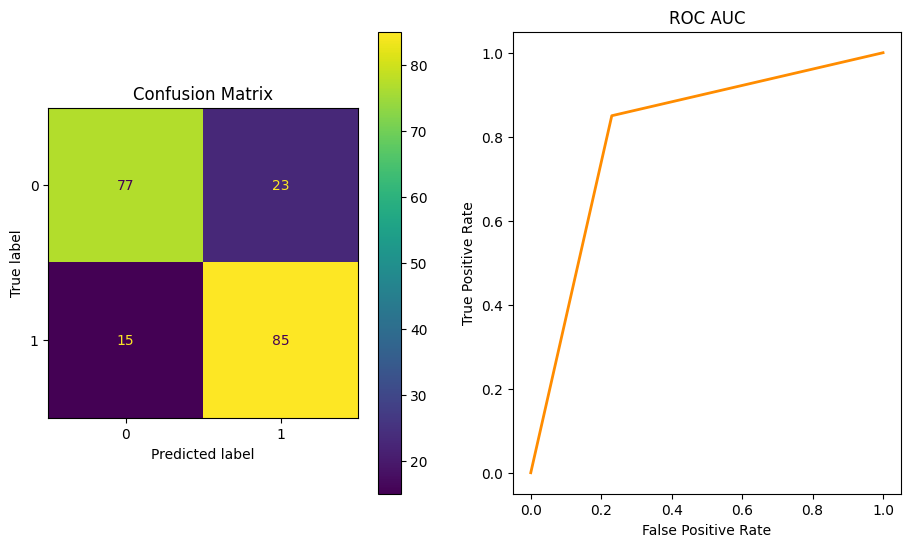

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       100
         1.0       0.79      0.85      0.82       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Accuracy Score: 0.8
F1 Score: 0.82
Recall Score: 0.86
Precision Score: 0.77
ROC AUC: 0.8
Fall-Out: 0.25
Miss-Rate: 0.14



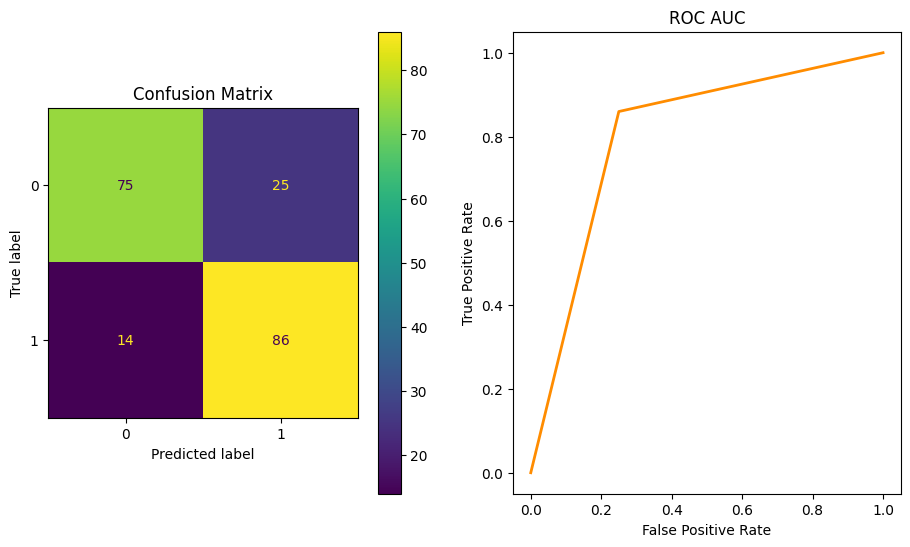

              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79       100
         1.0       0.77      0.86      0.82       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

Accuracy Score: 0.82
F1 Score: 0.82
Recall Score: 0.81
Precision Score: 0.84
ROC AUC: 0.82
Fall-Out: 0.16
Miss-Rate: 0.19



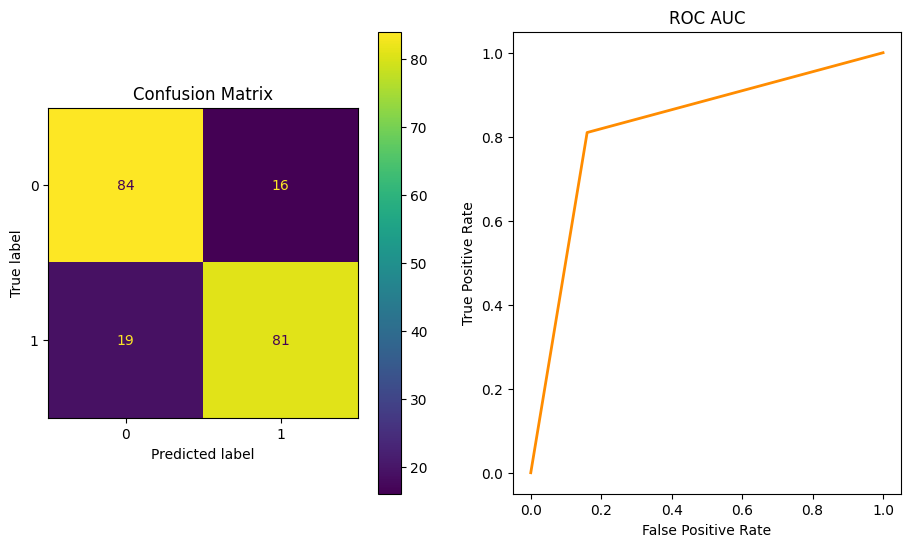

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       100
         1.0       0.84      0.81      0.82       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

Accuracy Score: 0.81
F1 Score: 0.82
Recall Score: 0.84
Precision Score: 0.79
ROC AUC: 0.81
Fall-Out: 0.22
Miss-Rate: 0.16



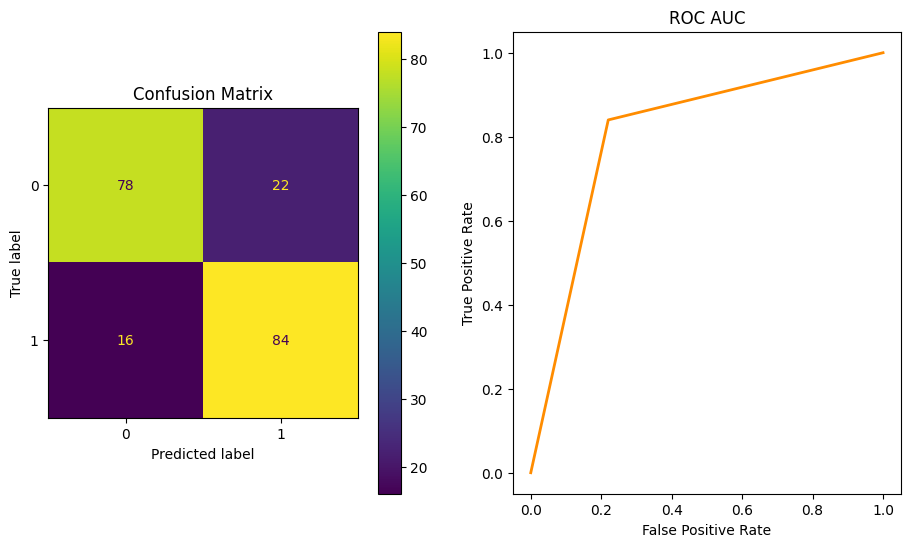

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       100
         1.0       0.79      0.84      0.82       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Accuracy Score: 0.79
F1 Score: 0.79
Recall Score: 0.81
Precision Score: 0.78
ROC AUC: 0.79
Fall-Out: 0.23
Miss-Rate: 0.19



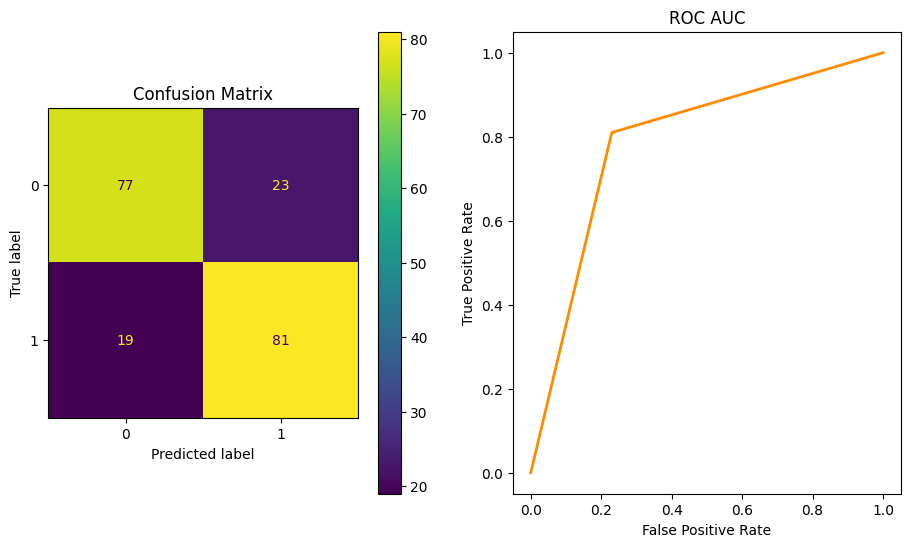

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79       100
         1.0       0.78      0.81      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200

Accuracy Score: 0.8
F1 Score: 0.8
Recall Score: 0.81
Precision Score: 0.79
ROC AUC: 0.8
Fall-Out: 0.21
Miss-Rate: 0.19



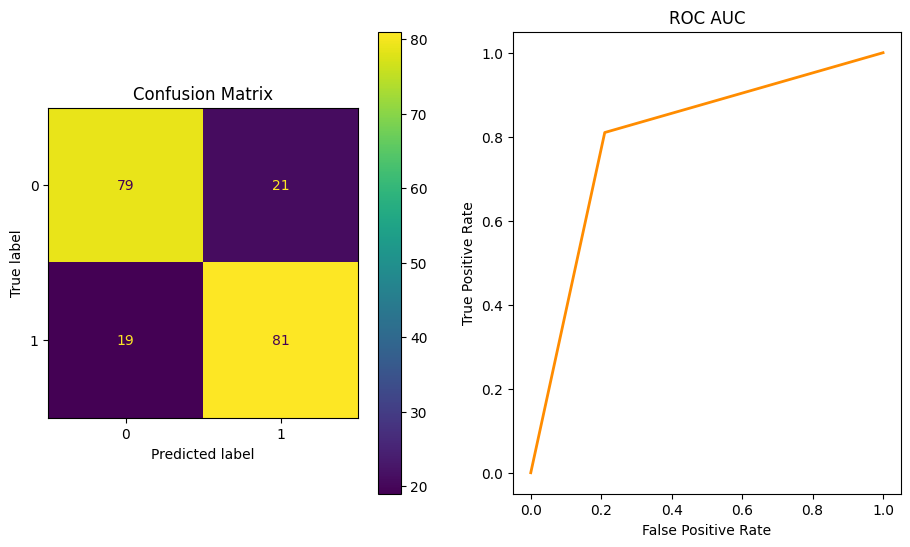

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       100
         1.0       0.79      0.81      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

Accuracy Score: 0.8
F1 Score: 0.8
Recall Score: 0.81
Precision Score: 0.79
ROC AUC: 0.8
Fall-Out: 0.22
Miss-Rate: 0.19



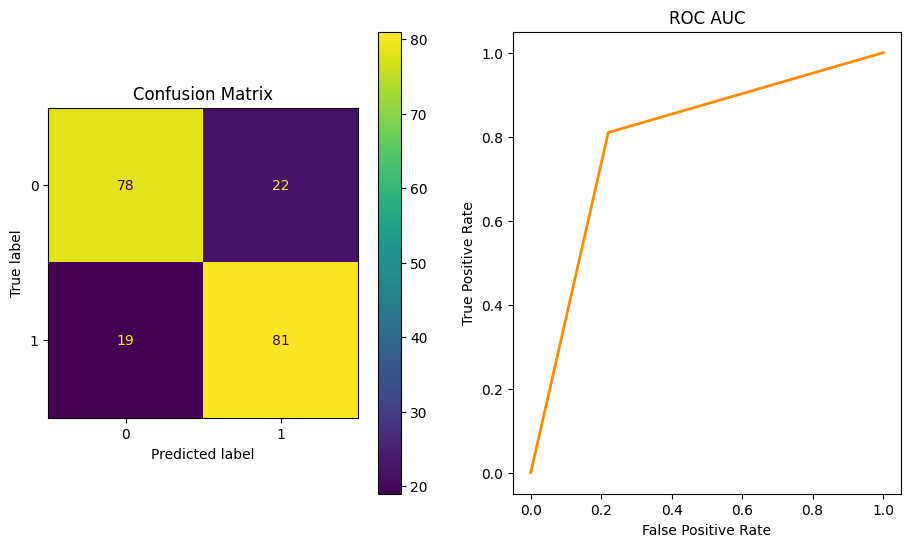

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       100
         1.0       0.79      0.81      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200

Mean Accuracy: 0.8
Mean F1-Score: 0.81
Mean Recall: 0.83
Mean Precision: 0.79
Mean AUC: 0.8
Mean Fall-Out: 0.22
Mean Miss-Rate: 0.17


In [ ]:
accs, f1s, recalls, precs, aucs, fprs, fnrs = [], [], [], [], [], [], []
for i in range(len(bags_x) - 1):#f'/kaggle/working/Bagg{i}-model.pt'
  model = torch.load(f'/content/drive/MyDrive/Result/Bagging/Fold5/Bagg{i}-model.pt').to(device)
  prediction, y_real, pred_sig = predict(model, i)
  acc, f1, recall, prec, auc, fpr, fnr = analysis_model(prediction.cpu().detach().numpy(), y_real.cpu().detach().numpy())
  accs.append(acc)
  f1s.append(f1)
  recalls.append(recall)
  precs.append(prec)
  aucs.append(auc)
  fprs.append(fpr)
  fnrs.append(fnr)

print(f'Mean Accuracy: {round(sum(accs) / len(accs), 2)}')
print(f'Mean F1-Score: {round(sum(f1s) / len(f1s), 2)}')
print(f'Mean Recall: {round(sum(recalls) / len(recalls), 2)}')
print(f'Mean Precision: {round(sum(precs) / len(precs), 2)}')
print(f'Mean AUC: {round(sum(aucs) / len(aucs), 2)}')
print(f'Mean Fall-Out: {round(sum(fprs) / len(fprs), 2)}')
print(f'Mean Miss-Rate: {round(sum(fnrs) / len(fnrs), 2)}')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Result/Bagging/resultB.csv")
df.drop(["Unnamed: 0"] ,axis = 1 ,inplace= True)
result = {
    'Mean Accuracy': round(sum(accs) / len(accs), 2),
    'Mean F1-Score': round(sum(f1s) / len(f1s), 2),
    'Mean Recall': round(sum(recalls) / len(recalls), 2),
    'Mean Precision': round(sum(precs) / len(precs), 2),
    'Mean AUC': round(sum(aucs) / len(aucs), 2),
    'Mean Fall-Out': round(sum(fprs) / len(fprs), 2),
    'Mean Miss-Rate': round(sum(fnrs) / len(fnrs), 2)
}

result_df = pd.DataFrame([result])

# Concatenate the two DataFrames vertically
df = pd.concat([df, result_df], ignore_index=True)
df.to_csv('/content/drive/MyDrive/Result/Bagging/resultB.csv')

df

,Mean Accuracy,Mean F1-Score,Mean Recall,Mean Precision,Mean AUC,Mean Fall-Out,Mean Miss-Rate
0,0.78,0.81,0.89,0.74,0.78,0.32,0.11
1,0.79,0.80,0.81,0.79,0.80,0.22,0.19
2,0.80,0.81,0.88,0.75,0.80,0.29,0.12
3,0.78,0.77,0.75,0.80,0.78,0.19,0.25
4,0.80,0.81,0.83,0.79,0.80,0.22,0.17


In [ ]:
models_1, models_2, models_3, models_4, models_5 = [], [], [], [], []

for i in range(len(bags_x) - 1):
  models_1.append(torch.load(f'/content/drive/MyDrive/Result/Bagging/Fold1/Bagg{i}-model.pt').to(device).eval())
  models_2.append(torch.load(f'/content/drive/MyDrive/Result/Bagging/Fold2/Bagg{i}-model.pt').to(device).eval())
  models_3.append(torch.load(f'/content/drive/MyDrive/Result/Bagging/Fold3/Bagg{i}-model.pt').to(device).eval())
  models_4.append(torch.load(f'/content/drive/MyDrive/Result/Bagging/Fold4/Bagg{i}-model.pt').to(device).eval())
  models_5.append(torch.load(f'/content/drive/MyDrive/Result/Bagging/Fold5/Bagg{i}-model.pt').to(device).eval())


In [ ]:
def Predict():
  pred_sig = torch.tensor([]).to(device)
  predicted = torch.tensor([]).to(device)
  y_real = torch.tensor([]).to(device)
  with torch.no_grad():
    for inputs, targets in test_loaders[5]:
      inputs = inputs.to(device)
      targets = targets.to(device)
      inputs = inputs.unsqueeze(1)
      inputs = inputs.float()
      targets = targets.float()

      out_1, out_2, out_3, out_4, out_5 = 0, 0, 0 ,0 ,0

      for i in range(len(bags_x) - 1):
        out_1 += models_1[i](inputs).squeeze()
        out_2 += models_2[i](inputs).squeeze()
        out_3 += models_3[i](inputs).squeeze()
        out_4 += models_3[i](inputs).squeeze()
        out_5 += models_3[i](inputs).squeeze()


      out_1 /= len(bags_x) - 1
      out_2 /= len(bags_x) - 1
      out_3 /= len(bags_x) - 1
      out_4 /= len(bags_x) - 1
      out_5 /= len(bags_x) - 1


      outputs = (out_1 + out_2 + out_3 + out_4 + out_5) / 3

      predictions = torch.sigmoid(outputs)
      pred_sig = torch.cat((pred_sig, predictions), dim=0)
      predictions[predictions <= 0.5] = 0
      predictions[predictions > 0.5] = 1
      predicted = torch.cat((predicted, predictions), dim=0)
      y_real = torch.cat((y_real, targets), dim=0)

  return predicted.squeeze(), y_real.squeeze(), pred_sig.squeeze()

In [ ]:
pred, real, sig = Predict()

Accuracy Score: 0.8
F1 Score: 0.82
Recall Score: 0.86
Precision Score: 0.77
ROC AUC: 0.8
Fall-Out: 0.25
Miss-Rate: 0.14



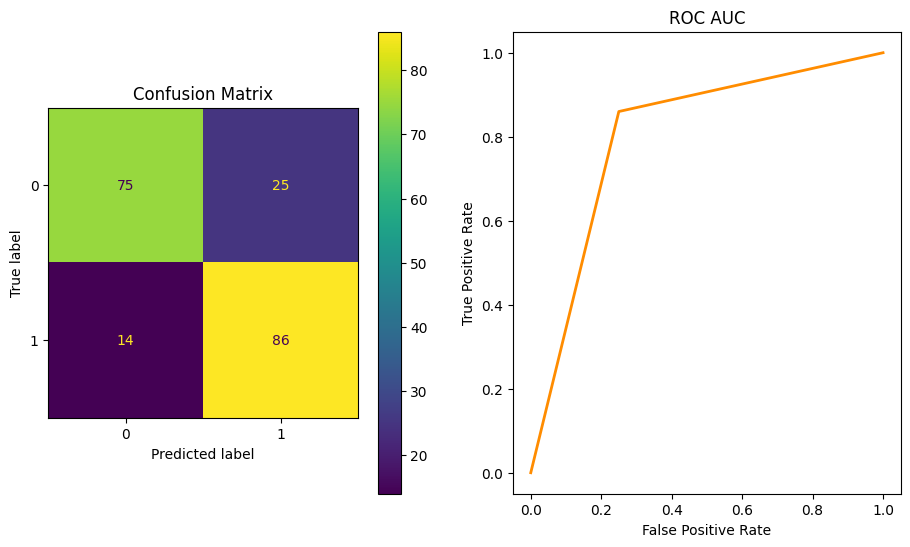

              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79       100
         1.0       0.77      0.86      0.82       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



In [ ]:
acc, f1, recall, prec, auc, fpr, fnr = analysis_model(pred.cpu().detach().numpy(), real.cpu().detach().numpy())

In [ ]:
arr = (real[:] == pred[:]).cpu().detach().numpy()
false_indices = np.where(arr == False)
len(false_indices[0])

39

In [ ]:
arr = (real[100:] == pred[100:]).cpu().detach().numpy()
false_indices = np.where(arr == False)
false_indices = np.array(false_indices) + 100
fn = tempTest[np.isin(tempTest.index, false_indices)]
fn

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke
101,34,0,0,85.27,26.600000,1,1,0,0,0,0,0,1,0,0,0,1
106,42,0,0,61.42,30.200000,0,0,1,0,0,0,0,1,0,0,0,1
116,59,0,0,96.16,44.100000,0,0,1,0,1,0,0,1,0,0,1,1
129,45,0,0,69.44,36.600000,2,1,0,0,1,1,0,0,0,0,0,1
136,48,0,0,84.20,29.700000,0,0,1,0,0,1,0,0,0,0,0,1
147,64,0,1,190.58,48.800000,0,0,1,0,1,1,0,0,0,0,1,1
159,42,1,0,80.68,44.000000,2,0,1,0,1,0,0,1,0,0,0,1
164,45,0,0,64.14,29.400000,0,0,1,0,1,0,0,1,0,0,1,1
166,46,0,0,85.90,25.100000,1,0,1,0,1,0,0,1,0,0,0,1
175,65,0,1,65.36,29.756194,2,0,1,0,1,1,0,0,0,0,1,1


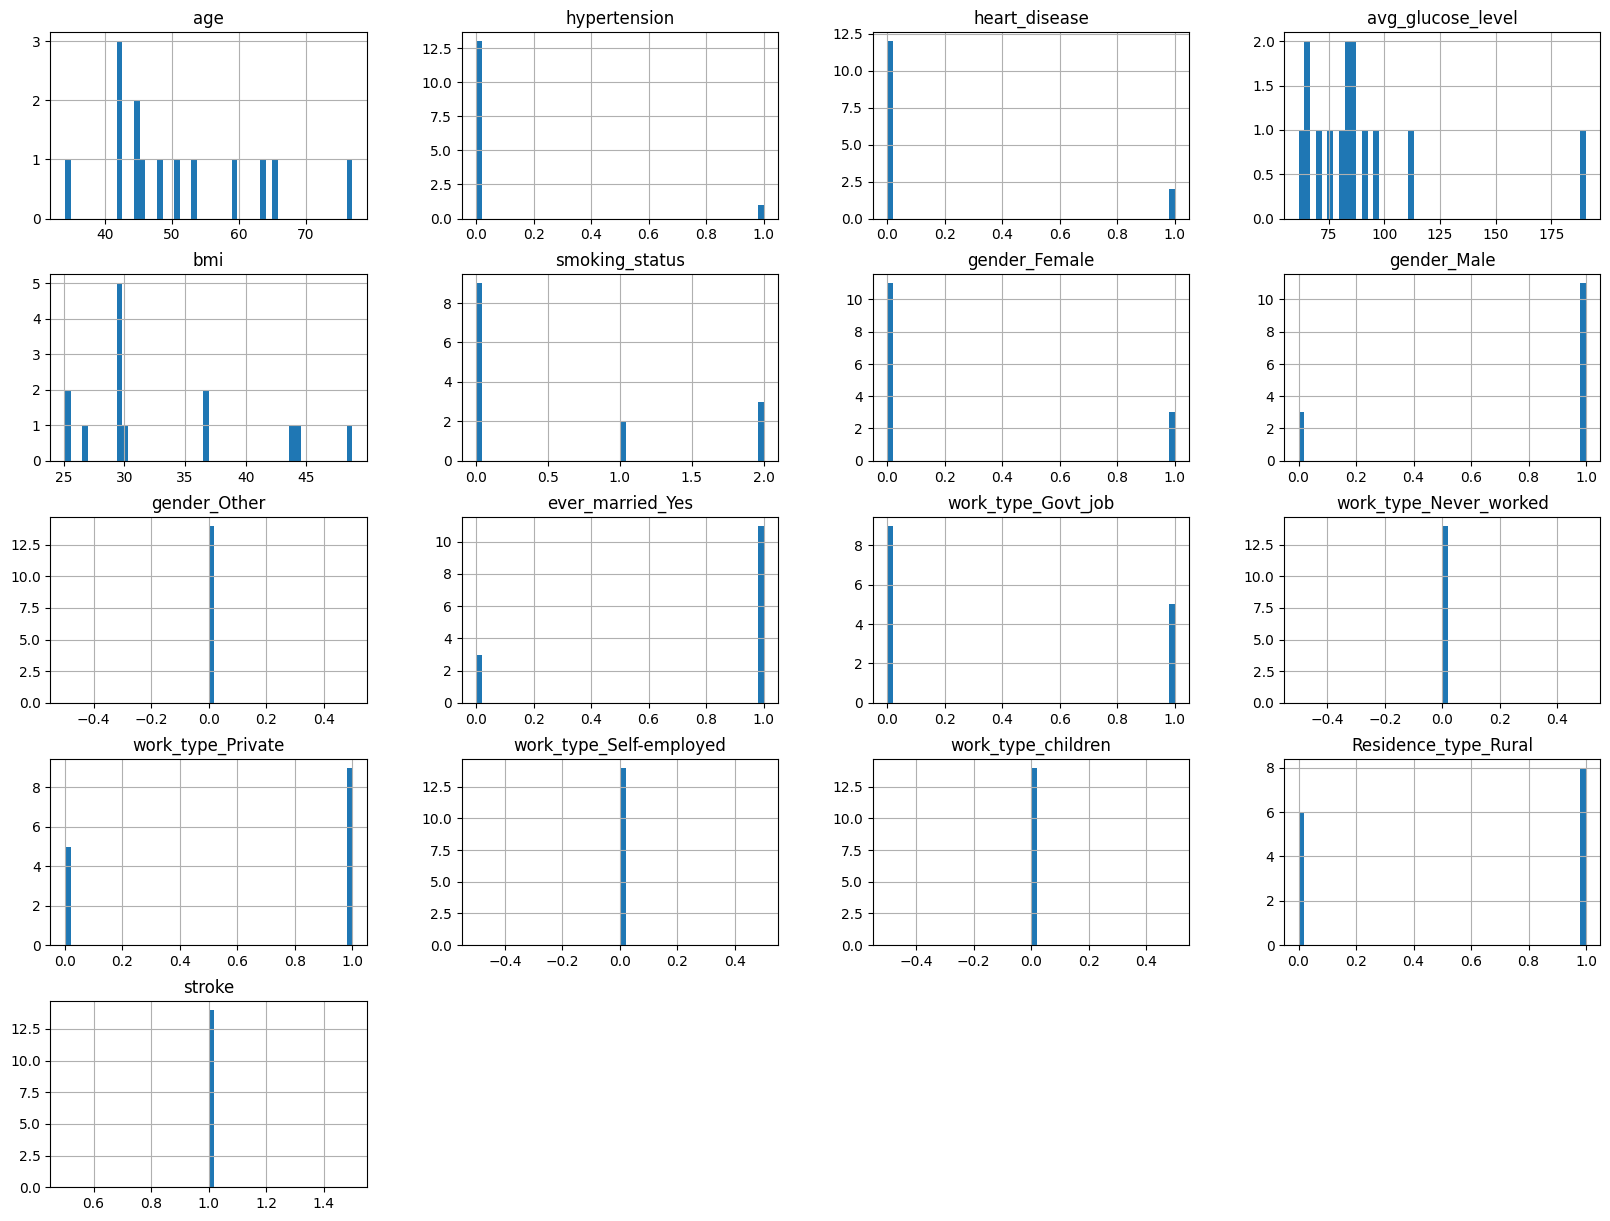

In [ ]:
fn.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
arr = (real[:100] == pred[:100]).cpu().detach().numpy()
false_indices = np.where(arr == True)
false_indices = np.array(false_indices)
tp = tempTest[np.isin(tempTest.index, false_indices)]
tp

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke
0,49,0,0,83.91,29.1,0,0,1,0,1,0,0,1,0,0,0,0
1,28,0,0,97.79,25.6,0,1,0,0,1,0,0,1,0,0,1,0
2,38,0,0,104.97,21.7,0,1,0,0,1,0,0,1,0,0,1,0
4,50,0,0,84.14,21.5,0,1,0,0,1,0,0,1,0,0,0,0
5,44,0,0,91.78,23.3,1,1,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,3,0,0,79.84,23.3,0,1,0,0,0,0,0,0,0,1,1,0
93,36,0,0,161.35,34.9,1,0,1,0,1,0,0,0,1,0,0,0
94,3,0,0,88.79,29.4,0,1,0,0,0,0,0,0,0,1,0,0
96,42,0,0,101.66,30.0,0,1,0,0,1,0,0,0,1,0,0,0


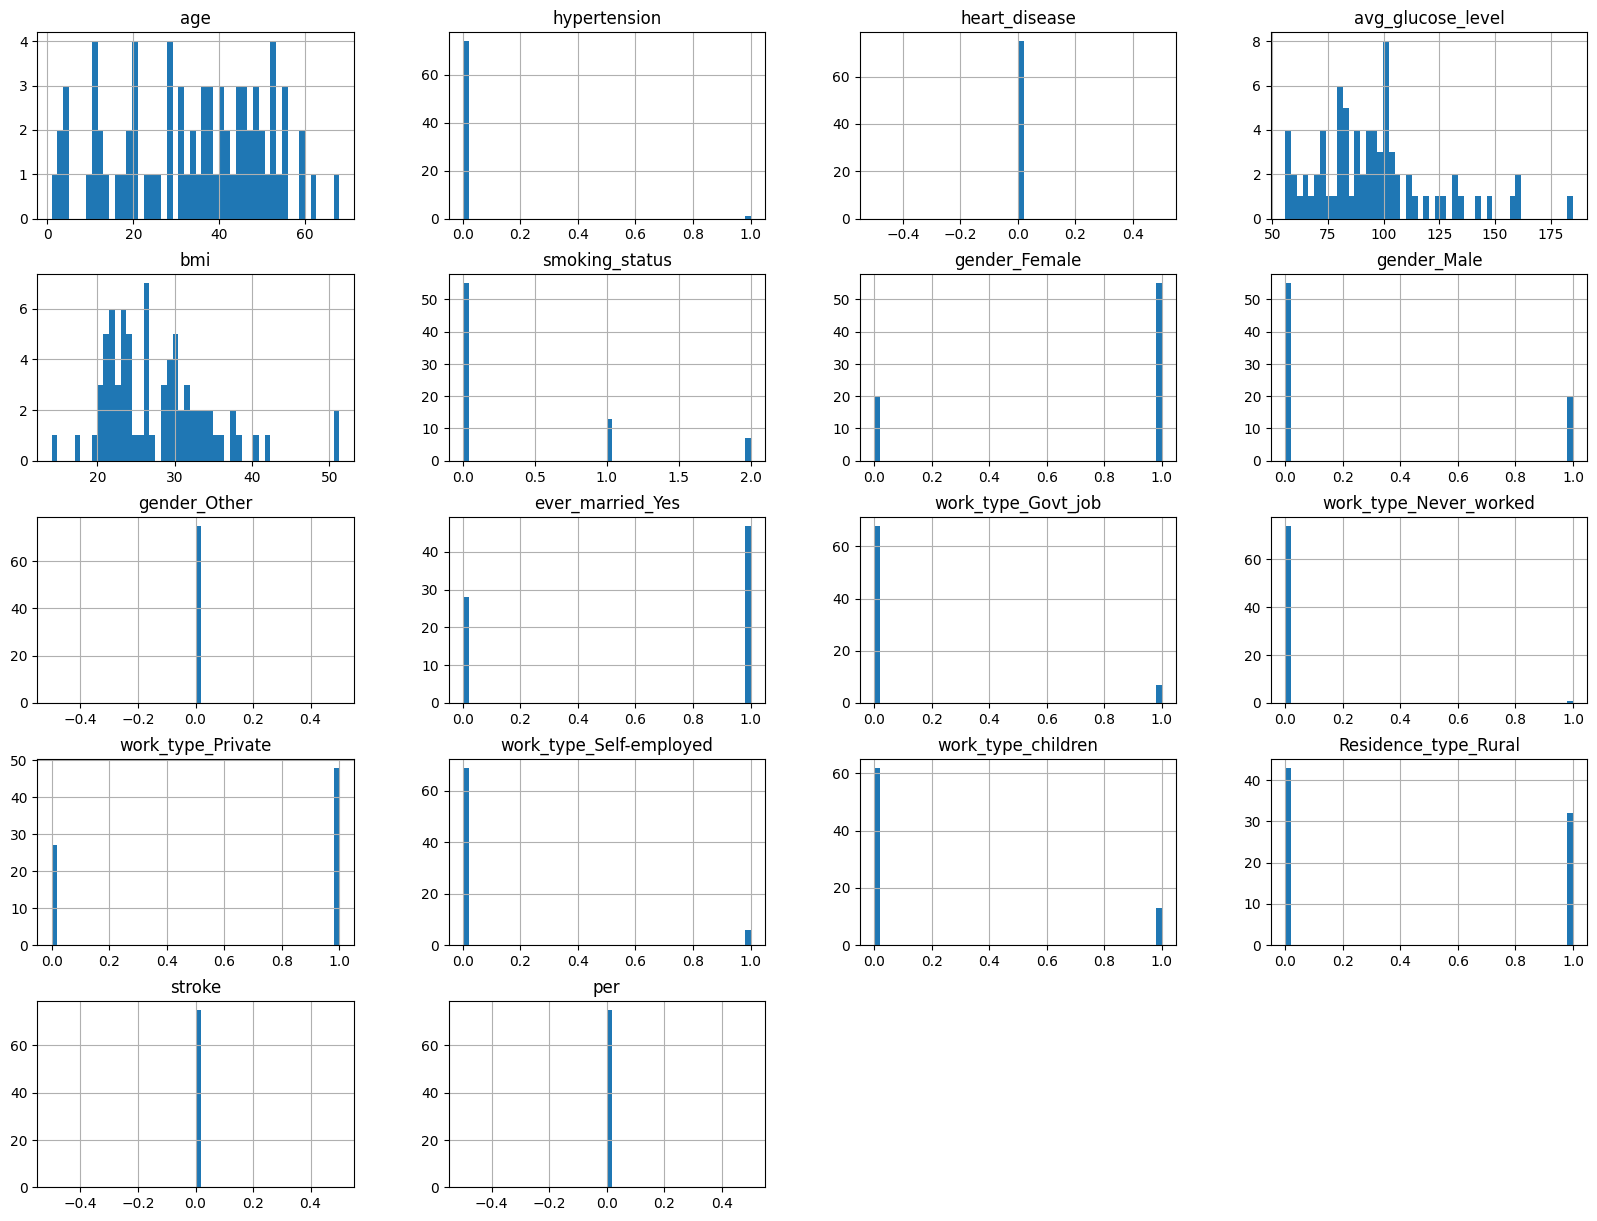

In [ ]:
tp.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
arr = (real[:100] == pred[:100]).cpu().detach().numpy()
false_indices = np.where(arr == False)
false_indices = np.array(false_indices)
fp = tempTest[np.isin(tempTest.index, false_indices)]
fp

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke
3,65,0,0,108.46,34.500000,0,0,1,0,1,0,0,1,0,0,1,0
10,73,0,0,118.33,23.100000,1,0,1,0,1,0,0,1,0,0,1,0
11,76,0,0,83.16,19.900000,0,1,0,0,0,0,0,0,1,0,0,0
13,59,0,0,68.22,27.100000,0,0,1,0,1,0,0,0,1,0,0,0
16,70,0,1,223.96,38.200000,0,0,1,0,1,1,0,0,0,0,1,0
19,71,0,0,65.69,36.500000,0,1,0,0,1,0,0,0,1,0,0,0
22,63,0,1,194.93,24.900000,1,0,1,0,1,0,0,1,0,0,1,0
23,64,0,0,67.86,28.700000,0,1,0,0,1,0,0,0,1,0,0,0
34,53,0,0,86.40,30.300000,0,0,1,0,1,0,0,1,0,0,0,0
35,61,0,0,100.89,30.300000,2,1,0,0,1,0,0,0,1,0,1,0


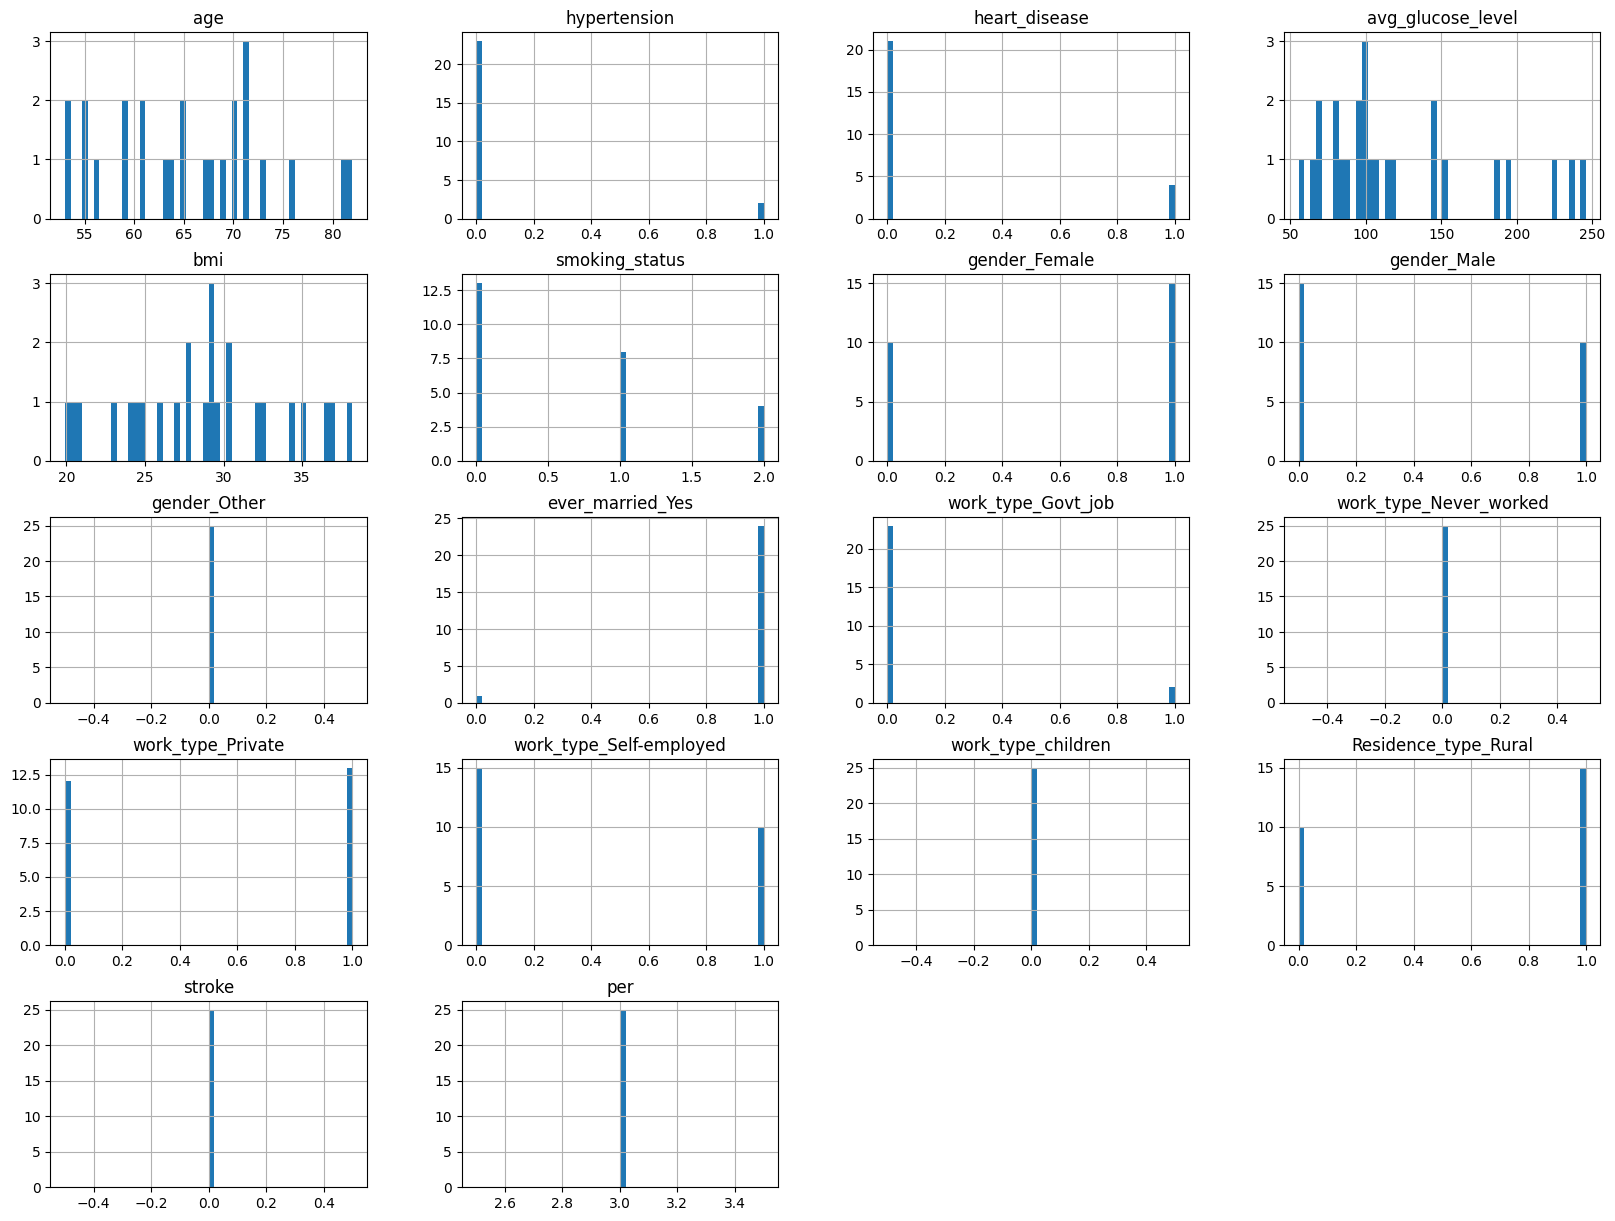

In [ ]:
fp.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
arr = (real[100:] == pred[100:]).cpu().detach().numpy()
false_indices = np.where(arr == True)
false_indices = np.array(false_indices) + 100
tn = tempTest[np.isin(tempTest.index, false_indices)]
tn

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke
100,81,0,0,101.55,27.600000,0,1,0,0,1,0,0,1,0,0,0,1
102,59,0,0,189.69,29.756194,0,0,1,0,1,0,0,1,0,0,0,1
103,74,0,0,101.67,27.900000,0,1,0,0,0,0,0,1,0,0,1,1
104,68,0,1,79.07,29.756194,0,0,1,0,1,0,0,0,1,0,0,1
105,81,0,0,81.48,17.500000,1,1,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,80,0,0,106.72,27.800000,0,1,0,0,1,0,0,1,0,0,0,1
194,50,1,0,167.41,30.900000,0,1,0,0,1,0,0,0,1,0,1,1
195,82,0,0,72.70,18.000000,0,1,0,0,1,0,0,0,1,0,0,1
198,68,0,0,233.94,42.400000,0,0,1,0,1,0,0,1,0,0,1,1


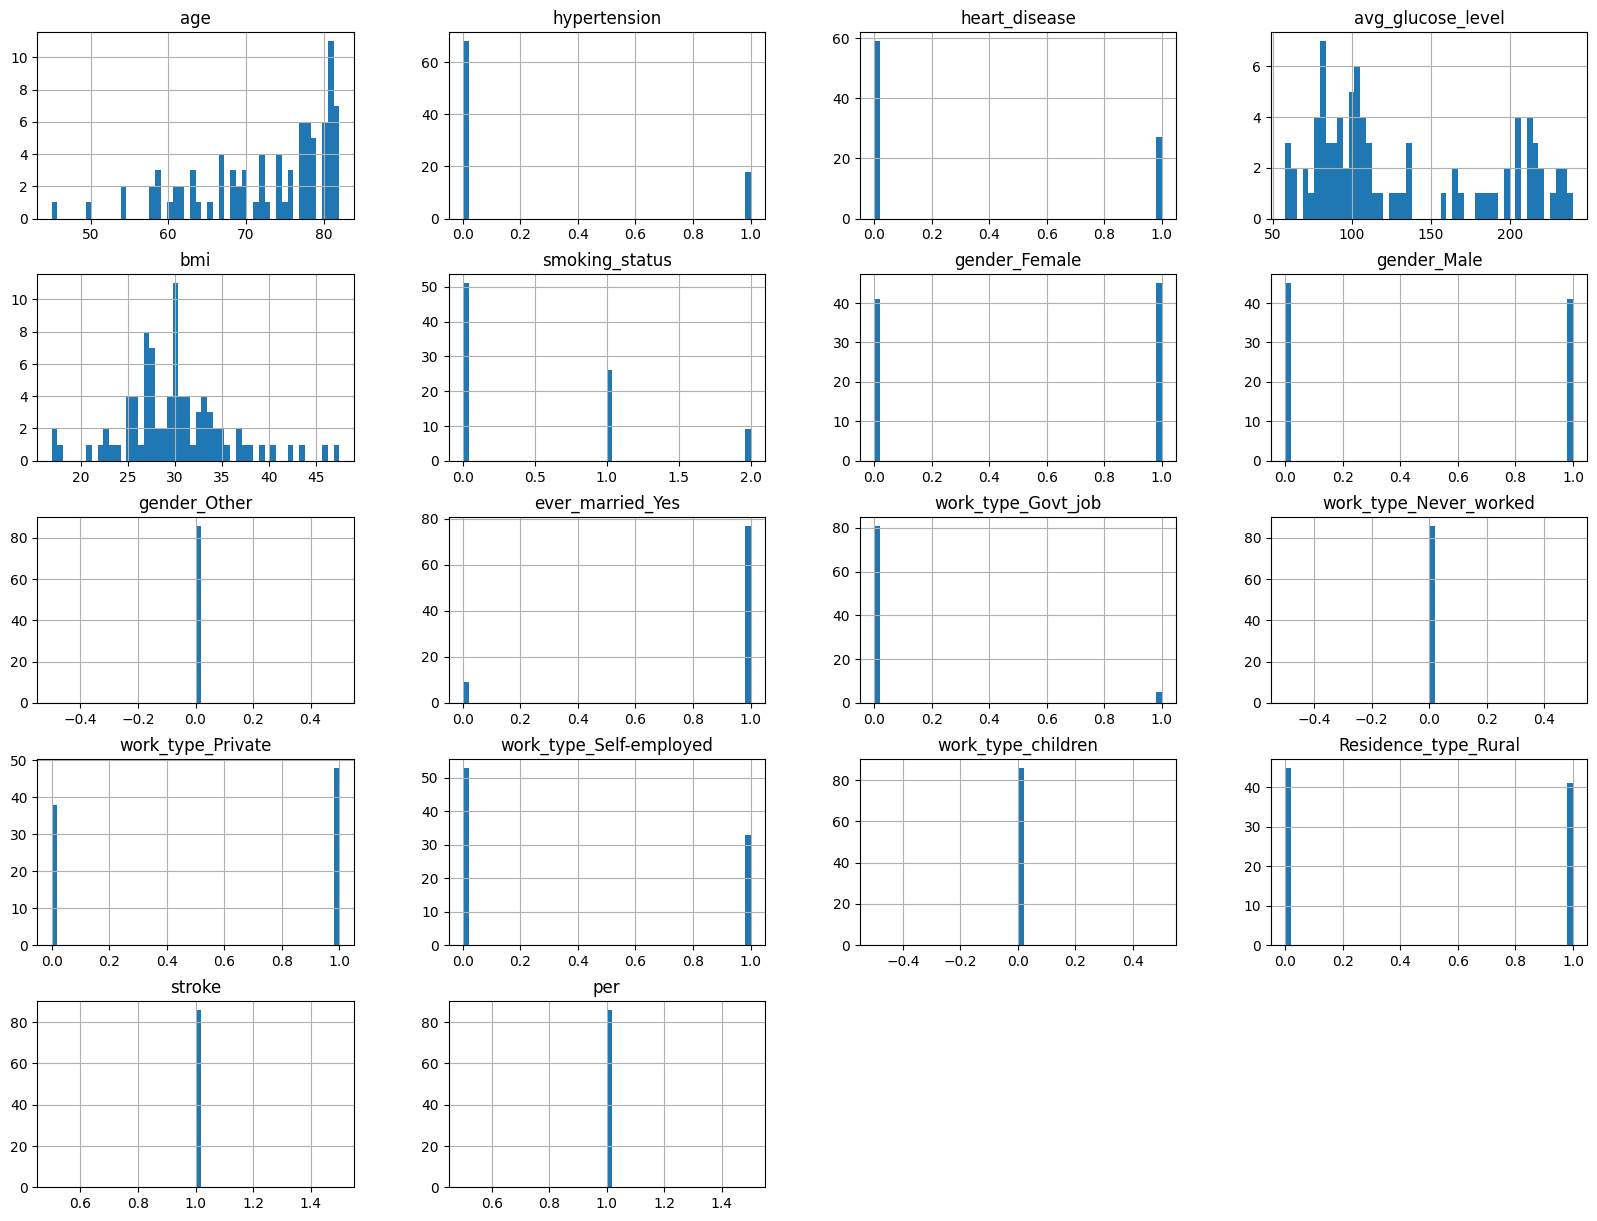

In [ ]:
tn.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
fn["per"] = 2
fp["per"] = 3
tp["per"] = tp["stroke"]
tn["per"] = tn["stroke"]
tempResult = pd.concat([fn, fp, tp, tn])
tempResult

<ipython-input-83-ffca93304bf2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-ffca93304bf2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-ffca93304bf2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-ffca933

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,per
101,34,0,0,85.27,26.6,1,1,0,0,0,0,0,1,0,0,0,1,2
106,42,0,0,61.42,30.2,0,0,1,0,0,0,0,1,0,0,0,1,2
116,59,0,0,96.16,44.1,0,0,1,0,1,0,0,1,0,0,1,1,2
129,45,0,0,69.44,36.6,2,1,0,0,1,1,0,0,0,0,0,1,2
136,48,0,0,84.20,29.7,0,0,1,0,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,80,0,0,106.72,27.8,0,1,0,0,1,0,0,1,0,0,0,1,1
194,50,1,0,167.41,30.9,0,1,0,0,1,0,0,0,1,0,1,1,1
195,82,0,0,72.70,18.0,0,1,0,0,1,0,0,0,1,0,0,1,1
198,68,0,0,233.94,42.4,0,0,1,0,1,0,0,1,0,0,1,1,1


In [ ]:
tempResult = tempResult.sort_index(ascending=True)
tempResult["sig"] = sig.cpu().detach().numpy()
tempResult["per"].unique()

array([0, 3, 1, 2])

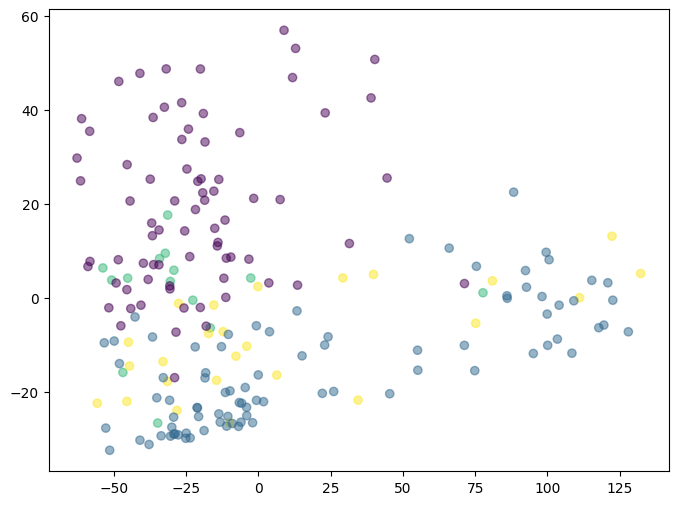

In [ ]:
from sklearn.decomposition import PCA, KernelPCA


pca_scaled = PCA(n_components=3, random_state=42)

x_pca_s = pca_scaled.fit_transform(tempResult)

plt.figure(figsize=(8, 6))
plt.scatter(x_pca_s[:, 0], x_pca_s[:, 1], c=tempResult['per'], cmap='viridis', alpha=0.5)
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.scatter_3d(pd.DataFrame(x_pca_s), x=0, y=1, z=2, color=tempResult['per'])
fig.show()

In [ ]:
df = tempResult[(tempResult["sig"] > 0.60) | (tempResult["sig"] < 0.40)]
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,per,sig
1,28,0,0,97.79,25.6,0,1,0,0,1,0,0,1,0,0,1,0,0,0.021269
2,38,0,0,104.97,21.7,0,1,0,0,1,0,0,1,0,0,1,0,0,0.118234
4,50,0,0,84.14,21.5,0,1,0,0,1,0,0,1,0,0,0,0,0,0.337855
5,44,0,0,91.78,23.3,1,1,0,0,1,1,0,0,0,0,1,0,0,0.367988
6,11,0,0,93.25,26.1,0,0,1,0,0,0,0,0,0,1,1,0,0,0.000352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,50,1,0,167.41,30.9,0,1,0,0,1,0,0,0,1,0,1,1,1,0.615276
195,82,0,0,72.70,18.0,0,1,0,0,1,0,0,0,1,0,0,1,1,0.763127
197,42,0,0,83.41,25.4,0,0,1,0,1,0,0,1,0,0,1,1,2,0.319883
198,68,0,0,233.94,42.4,0,0,1,0,1,0,0,1,0,0,1,1,1,0.709217


In [ ]:
df[df["per"] == 2]

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,per,sig
101,34,0,0,85.27,26.600000,1,1,0,0,0,0,0,1,0,0,0,1,2,0.036123
106,42,0,0,61.42,30.200000,0,0,1,0,0,0,0,1,0,0,0,1,2,0.223041
129,45,0,0,69.44,36.600000,2,1,0,0,1,1,0,0,0,0,0,1,2,0.361785
136,48,0,0,84.20,29.700000,0,0,1,0,0,1,0,0,0,0,0,1,2,0.077284
164,45,0,0,64.14,29.400000,0,0,1,0,1,0,0,1,0,0,1,1,2,0.395157
166,46,0,0,85.90,25.100000,1,0,1,0,1,0,0,1,0,0,0,1,2,0.394947
175,65,0,1,65.36,29.756194,2,0,1,0,1,1,0,0,0,0,1,1,2,0.393383
187,77,0,0,75.66,36.700000,0,0,1,0,1,1,0,0,0,0,1,1,2,0.260800
197,42,0,0,83.41,25.400000,0,0,1,0,1,0,0,1,0,0,1,1,2,0.319883


In [ ]:

x_pca_s3 = pca_scaled.fit_transform(df)
fig = px.scatter_3d(pd.DataFrame(x_pca_s3), x=0, y=1, z=2, color=df['per'])
fig.show()

In [ ]:
x_pca_s2 = pca_scaled.fit_transform(tempResult[tempResult["per"] == 2])
fig = px.scatter_3d(pd.DataFrame(x_pca_s2), x=0, y=1, z=2, color=tempResult.index)
fig.show()

ValueError: ignored

In [ ]:
tempResult[tempResult["per"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
age,75.0,33.773333,16.821458,1.000000,20.000000,36.000000,47.000000,68.000000
hypertension,75.0,0.013333,0.115470,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,75.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
avg_glucose_level,75.0,95.221867,26.659543,55.880000,79.345000,93.020000,103.340000,185.020000
bmi,75.0,27.806832,6.843452,14.100000,22.650000,26.600000,31.400000,51.300000
smoking_status,75.0,0.360000,0.650156,0.000000,0.000000,0.000000,1.000000,2.000000
gender_Female,75.0,0.733333,0.445195,0.000000,0.000000,1.000000,1.000000,1.000000
gender_Male,75.0,0.266667,0.445195,0.000000,0.000000,0.000000,1.000000,1.000000
gender_Other,75.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ever_married_Yes,75.0,0.626667,0.486947,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
tempResult[]

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,per,sig
0,49,0,0,83.91,29.100000,0,0,1,0,1,0,0,1,0,0,0,0,0,0.467823
1,28,0,0,97.79,25.600000,0,1,0,0,1,0,0,1,0,0,1,0,0,0.021269
2,38,0,0,104.97,21.700000,0,1,0,0,1,0,0,1,0,0,1,0,0,0.118234
3,65,0,0,108.46,34.500000,0,0,1,0,1,0,0,1,0,0,1,0,3,0.582958
4,50,0,0,84.14,21.500000,0,1,0,0,1,0,0,1,0,0,0,0,0,0.337855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,82,0,0,72.70,18.000000,0,1,0,0,1,0,0,0,1,0,0,1,1,0.763127
196,51,0,0,111.91,29.756194,0,0,1,0,1,0,0,1,0,0,1,1,2,0.457643
197,42,0,0,83.41,25.400000,0,0,1,0,1,0,0,1,0,0,1,1,2,0.319883
198,68,0,0,233.94,42.400000,0,0,1,0,1,0,0,1,0,0,1,1,1,0.709217
